# U.S. Medical Insurance Costs

In this project, we will work with US medical insurance data that is stored in CSV file as **insurance.csv**. We will apply Python fundamentals and use Pandas to extract the patients' data. After that, we will analyze the data with Pandas, Numpy, SciPy and Statsmodels, and present them in a visually appealing figures with Matplotlib and Seaborn.

## Purpose
The <span style= 'color:goldenrod'> **main purpose** </span> of this project is to have a better understanding of how different factors in patient medical records contibute to their final insurance cost, and whether one factor is associated with another. I will be using a hint to statitics, hypothesis testing and visualization to confirm such associations.

The project is divided into four sections:
* <span style= 'color:steelblue'> Inspecting the Data with Pandas: </span>

to have an outlook about the file we are about to work with, check for missing data.
* <span style= 'color:steelblue'> Extracting Data for Analysis: </span>

reading the csv file, storing the patients data in lists to use later on, fixing data types.
* <span style= 'color:steelblue'> Data Analysis: </span>

constructing a class to work with patients data, inspecting how each factor is related to insurance cost, how one factor is related to another and checking for associations using visualization and statistics.
* <span style= 'color:steelblue'> Conclusions </span>

In [896]:
# importing libraries
import pandas as pd
import csv
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stat
from statsmodels.stats.multicomp import pairwise_tukeyhsd


In [897]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

## Inspecting the Data with Pandas

First, I will be reading **insurance.csv** using Pandas library and inspecting the first 5 rows to have an idea about the data we are working with.

In [898]:
# reading csv file into a dataframe with Pandas and inspecting the first five rows 
insurance = pd.read_csv('insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [899]:
# gets descriptive statistics about the data
insurance.describe(include= 'all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [900]:
# checking column names
insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [901]:
# checking for missing values
insurance.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [902]:
# checking data types of each column
insurance.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

We note that:
- total number of patients in the **insurance.csv** is 1338 patients
- there are seven columns: `age`, `sex`, `bmi`, `children`, `smoker`, `region` and `charges`
- there is no missing data in any of the seven columns
- `age`, `bmi`, `children` and `charges` are numerical/quantitve variables
- `age` and `children` are integers, whereas `bmi` and `charges` are floats
- `sex`, `smoker` and `region` are categorical variables
- `sex` and `smoker` are binary categorical variables

> and even more information about the data ..

- `age`:
    - avergae age of all patients is 39.2 ± 14.1 years old 
    - youngest and oldest patients are 18 and 64 years old, respectively 
    - median age of patients is 39 years old
    - 50% of patients has an age ranging between 27 and 51 years old
    - average and median values suggest that the data is normally distibuted
- `sex`:
    - there are two unqiue values, male and female
    - males are more than females with 676 male patients out of 1338
- `bmi`:
    - average bmi of all patients is 30.7 ± 6.1 'obese range'
    - lowest BMI is 15.9 and the highest BMI is 53.13
    - median BMI is 30.4 'obese range'
    - average and median values suggest that the data is normally distibuted
- `children`:
    - the number of children patient has ranges between 0 to 5 children
    - average number of children is 1 child
    - 50% of patients has 0 to 2 children
- `smoker`:
    - there are two unqiue values, no and yes
    - most patients in the data are non-smokers with 1064 non-smokers out 1338
-`region`:
    - there are four unique regions
    - most patients are from southeast with 364 out of 1338
- `charges`:
    - average insurance cost of all patients is \$13,270.42 ± 12,110.01
    - the lowest insurance cost is \\$1,121.87 and the highest is \\$63,770.43
    - median insurance cost is \\$9,382.03
    - average and median values suggest that there might be more 'low' insurance cost patients
    - 50% of patients pay between \\$4,740.29 - \$16,639.91 per year



# Extracting Data for Analysis

Using Pandas, we were able to form an idea about the data which we will be working with. So far, we know that **insurance.csv** contains the following data:

* **Patient age:** integer saved as a string
* **Patient sex:** string either male or female
* **Patient BMI (body mass index):** float saved as a string
* **Number of children the patient has:** integer saved as a string
* **Smoking status of patient:** either yes for smokers or no for non-smokers
* **Patient US geographical region:** a string
* **Patient yearly insurance costs:** in USD, float saved as a string

The columns are named as follows in the csv file: `age`, `sex`, `bmi`, `children`, `smoker`, `region` and `charges`.

To work with the data, we created an empty list for each of the seven columns to store the associated data in.

We need to read the csv file using the function `data_reader()` that takes 3 arugments; csv file name, column name and the corresponding empty list. For example, `ages` list will take in the data from `age` column.




In [903]:
# creating empty lists for each column to store the data
ages = []
genders = []
bmis = []
num_of_children = []
smoking_statuses = []
regions = []
insurance_costs = []

The function `data_reader` reads **insurance.csv**, iterates through every row and appends column data into the corresponding empty list from above:

In [904]:
# the function data_reader() takes three arguments;
# file: the csv file to be read and extract data from
# column: the column's name
# lst: an empty list from above to store the data in

def data_reader(file, column, lst):
    with open(file) as file_csv:
        file_data = csv.DictReader(file_csv)
        for row in file_data:
            lst.append(row[column])
          
        return lst  

In [905]:
# example: reading and storing ages of patients from insurance.csv file into ages list
# inspecting only the first 10 patient ages' for readibility

print(data_reader('insurance.csv', 'age', ages)[:10])

['19', '18', '28', '33', '32', '31', '46', '37', '37', '60']


Filling the rest of empty lists with data from **insurance.csv** :

In [906]:
data_reader('insurance.csv', 'sex', genders)
data_reader('insurance.csv', 'bmi', bmis)
data_reader('insurance.csv', 'children', num_of_children)
data_reader('insurance.csv', 'smoker', smoking_statuses)
data_reader('insurance.csv', 'region', regions)
data_reader('insurance.csv', 'charges', insurance_costs)

['16884.924',
 '1725.5523',
 '4449.462',
 '21984.47061',
 '3866.8552',
 '3756.6216',
 '8240.5896',
 '7281.5056',
 '6406.4107',
 '28923.13692',
 '2721.3208',
 '27808.7251',
 '1826.843',
 '11090.7178',
 '39611.7577',
 '1837.237',
 '10797.3362',
 '2395.17155',
 '10602.385',
 '36837.467',
 '13228.84695',
 '4149.736',
 '1137.011',
 '37701.8768',
 '6203.90175',
 '14001.1338',
 '14451.83515',
 '12268.63225',
 '2775.19215',
 '38711',
 '35585.576',
 '2198.18985',
 '4687.797',
 '13770.0979',
 '51194.55914',
 '1625.43375',
 '15612.19335',
 '2302.3',
 '39774.2763',
 '48173.361',
 '3046.062',
 '4949.7587',
 '6272.4772',
 '6313.759',
 '6079.6715',
 '20630.28351',
 '3393.35635',
 '3556.9223',
 '12629.8967',
 '38709.176',
 '2211.13075',
 '3579.8287',
 '23568.272',
 '37742.5757',
 '8059.6791',
 '47496.49445',
 '13607.36875',
 '34303.1672',
 '23244.7902',
 '5989.52365',
 '8606.2174',
 '4504.6624',
 '30166.61817',
 '4133.64165',
 '14711.7438',
 '1743.214',
 '14235.072',
 '6389.37785',
 '5920.1041',
 '176

We notice that although `ages` data are integers, they are saved as strings. The same issue applies for `bmis`, `num_of_children` and `insurance_costs`.

To fix this data type issue, we will use list comprehension to convert string to the correct representation (integer for `ages` and `num_of_children` ,and float for `bmis` and `insurance_costs`). This step will save us from converting data type everytime we want to use the lists.

In [907]:
# list comprehension to fix data type of ages from string to integer
# checking the first 10 ages

ages = [int(age) for age in ages]
print(ages[:10])

[19, 18, 28, 33, 32, 31, 46, 37, 37, 60]


Doing the same for `bmis`, `num_of_children` and `insurance_costs`

In [908]:
bmis = [float(bmi) for bmi in bmis]
num_of_children = [int(num) for num in num_of_children]
insurance_costs = [float(cost) for cost in insurance_costs]

It was relatively easy to know that there is two unique values in `sex` and `smoker` columns since they are binary variables, but this doesn't apply to `region`.

Instead of scrolling through the data, I wanted to check the unique values in `region` column that is stored in `regions` list using Numpy's `unique()`

In [909]:
regions_array = np.array(regions)
print(np.unique(regions_array))

['northeast' 'northwest' 'southeast' 'southwest']


looks like `region` column has 4 different values, northeast, northwest, southeast and southwest.

## Data Analysis 

We have several patient medical information (age, sex, BMI, number of children, smoking status, region and incurance cost). In this section, we will use class **PatientData** to:

- inspect every factor and check how they contribute to insurance cost
    
    for `age`:
    - average age of patients
    - youngest and oldest patients
    - dividing patients ages into four age groups
    - counting the number of patients in each group and their proprtions
    - average insurance cost for patients divided by age
    - which age group pays lowest and highest average insurance cost?
    
    for `sex`:
    - count the number of female and male patients and their proportions
    - average insurance cost for each gender
    - does female or male patients pay higher insurance cost?
    
    for `bmi`:
    - dividing patients into four BMI groups
    - counting th enumber of patients in each BMI group and their proportions
    - average insurance cost for patients divided by their BMI
    - which BMI group pays the lowest and highest average insurance cost?
    
    for `children_num`:
    - counting the number of patients divided by their number of children
    - average insurance cost for patients divided by their number of children
    - how many children are associated with patients who pay the lowest and highest insurance cost?
    
    for `smoking`:
    - counting the number of smoking and non-smoking patients and their proportions
    - avergae insurance cost of smokers and non-smokers
    - which group pays higher insurance cost?
    
    for `region`:
    - retrieve unique regions
    - count the number of patients in every region and their proprtions
    - average insurance cost for every region
    - which region has patients who pay the lowest and the highest average insurance cost? 
 

 - how one factor is related to another

    `region` and `age`
    - average age of patients in a single region

    `region` and `bmi`
    - average BMI of patients in a single region
    
    `region` and `smoking`
    - number and proportions of smokers and non-smokers in a single region

class **PatientData** has also some methods that enable interaction by prompoting input from the user to:
- print medical indormation of a single patient
- print medical information of several patients
- get the number of patients in a specific region
- get the average age, average BMI and smoking status for patients in a specific region

In [910]:
class PatientData:
    
    
    def __init__(self, age, sex, bmi, children_num , smoking, region, insurance_cost):
        self.age = age
        self.sex = sex
        self.bmi = bmi
        self.children_num = children_num
        self.smoking = smoking
        self.region = region
        self.insurance_cost = insurance_cost
    
    
    # whenever the object is called, it will print the following
    def __repr__(self):
        return '''
        age: {age}
        sex: {sex}
        BMI: {bmi}
        number of children: {num}
        smoking status: {smoking}
        region: {region}
        insurance cost: ${cost}'''.format(age= self.age, sex= self.sex, bmi= self.bmi, num= self.children_num, smoking= self.smoking, region= self.region, cost= self.insurance_cost)
    
    
    # to inspect medical data of a single patient
    def patient_info(self, value):
        print(' age: {age} \n sex: {sex} \n BMI: {bmi} \n number of children: {num} \
        \n smoking status: {smoking} \n region: {region} \n insurance cost: ${cost:,}'\
        .format(age= self.age[value], sex= self.sex[value], bmi= self.bmi[value], num= self.children_num[value], smoking= self.smoking[value], region= self.region[value], cost= round((self.insurance_cost[value]), 2)))
    
    
    # to inspect medical data of several patients
    # returns a dictionary with patients medical info     
    def patients_info(self, lst):
        
        patients_info_dict = {'age': [], 'sex': [], 'BMI': [], 'number of children': [], 'smoking status': [], 'region': [], 'insurance cost': []}
        
        for value in lst:
            patients_info_dict['age'].append(self.age[value])
            patients_info_dict['sex'].append(self.sex[value])
            patients_info_dict['BMI'].append(self.bmi[value])
            patients_info_dict['number of children'].append(self.children_num[value])
            patients_info_dict['smoking status'].append(self.smoking[value])
            patients_info_dict['region'].append(self.region[value])
            patients_info_dict['insurance cost'].append('${:,}'.format(round((self.insurance_cost[value]), 2)))
        
        print(patients_info_dict)
    
        
    # to calculate average age of all patients
    def average_age(self):
        
        total = 0
        
        for age in self.age:
            total += age
        avg_age = total/len(self.age)
        print('Average age is:', round(avg_age, 1), 'years old.')
    
    
    # to calculate average insurance cost of patients divided into four groups by their age
    # also, gets age groups associated with lowest and highest insurance cost
    def age_cost(self):
        
        min_age = min(self.age)
        max_age = max(self.age)
        mid_age = int(round(((min_age + max_age)/2), 0))
        min_to_mid_age = int(round(((min_age + mid_age)/2), 0))
        mid_to_max_age = int(round(((mid_age + max_age)/2), 0))
        
        age_group1 = range(min_age, min_to_mid_age+1)
        age_group2 = range(min_to_mid_age + 1, mid_age+1)
        age_group3 = range(mid_age + 1, mid_to_max_age+1)
        age_group4 = range(mid_to_max_age + 1, max_age+1)
        
        age_cost_lst = [(age, cost) for age, cost in zip(self.age, self.insurance_cost)]
        
        group1_cost, group2_cost= 0, 0
        group3_cost, group4_cost= 0, 0
        
        group1_count, group2_count = 0, 0
        group3_count, group4_count = 0, 0
        
        for item in age_cost_lst:
            if item[0] in age_group1:
                group1_cost += item[1]
                group1_count += 1
            elif item[0] in age_group2:
                group2_cost += item[1]
                group2_count += 1
            elif item[0] in age_group3:
                group3_cost += item[1]
                group3_count += 1
            elif item[0] in age_group4:
                group4_cost += item[1]
                group4_count += 1
        
        avg_group1_cost = round((group1_cost/group1_count), 2)
        avg_group2_cost = round((group2_cost/group2_count), 2)
        avg_group3_cost = round((group3_cost/group3_count), 2)
        avg_group4_cost = round((group4_cost/group4_count), 2)
        
        age_dict = {}
        
        age_dict[min_age, min_to_mid_age] = '{:,}'.format(avg_group1_cost)
        age_dict[min_to_mid_age+1, mid_age] = '{:,}'.format(avg_group2_cost)
        age_dict[mid_age+1, mid_to_max_age] = '{:,}'.format(avg_group3_cost)
        age_dict[mid_to_max_age+1, max_age] = '{:,}'.format(avg_group4_cost)
        
        total_age_patients = group1_count + group2_count + group3_count + group4_count
        
        
        print('The youngest patient is {min} years old and the oldest patient is {max} years old\n'.format(min= min_age ,max= max_age))
        print('By dividing the patients into four age groups ...\n')
        print(age_dict)
        print('\n')
        print('Age group between {min} - {min_mid} years old'.format(min= min_age, min_mid= min_to_mid_age))
        print('number of patients: {count} ({g1p:.2%}) \t average insurance cost: ${cost:,}.'.format(count= group1_count, g1p= (group1_count/total_age_patients), cost= avg_group1_cost))
        print('\n')
        print('Age group between {min_mid} - {mid} years old'.format(min_mid= min_to_mid_age+1, mid= mid_age))
        print('number of patients: {count} ({g2p:.2%}) \t average insurance cost: ${cost:,}.'.format(count= group2_count, g2p= (group2_count/total_age_patients), cost= avg_group2_cost))        
        print('\n')
        print('Age group between {mid} - {mid_max} years old'.format(mid= mid_age+1, mid_max= mid_to_max_age))
        print('number of patients: {count} ({g3p:.2%}) \t average insurance cost: ${cost:,}.'.format(count= group3_count, g3p= (group3_count/total_age_patients), cost= avg_group3_cost))                 
        print('\n')
        print('Age group between {mid_max} - {max} years old'.format(mid_max= mid_to_max_age+1, max= max_age))
        print('number of patients: {count} ({g4p:.2%}) \t average insurance cost: ${cost:,}.'.format(count= group4_count, g4p= (group4_count/total_age_patients), cost= avg_group4_cost))
        print('\n')
        
        min_cost = min(avg_group1_cost, avg_group2_cost, avg_group3_cost, avg_group4_cost)
        
        if min_cost == avg_group1_cost:
            print('age group (', min_age, '-', min_to_mid_age, ') has the lowest average insurance cost.')
        elif min_cost == avg_group2_cost:
            print('age group (', (min_to_mid_age+1), '-', mid_age, ') has the lowest average insurance cost.')
        elif min_cost == avg_group3_cost:
            print('age group (', (mid_age+1), '-', mid_to_max_age, ') has the lowest average insurance cost.')
        elif min_cost == avg_group4_cost:
            print('age group (', (mid_to_max_age+1), '-', max_age, ') has the lowest average insurance cost.')
        
        print('\n')
        
        max_cost = max(avg_group1_cost, avg_group2_cost, avg_group3_cost, avg_group4_cost)
        
        if max_cost == avg_group1_cost:
            print('age group (', min_age, '-', min_to_mid_age, ') has the highest average insurance cost.')
        elif max_cost == avg_group2_cost:
            print('age group (', (min_to_mid_age+1), '-', mid_age, ') has the highest average insurance cost.')
        elif max_cost == avg_group3_cost:
            print('age group (', (mid_age+1), '-', mid_to_max_age, ') has the highest average insurance cost.')
        elif max_cost == avg_group4_cost:
            print('age group (', (mid_to_max_age+1), '-', max_age, ') has the highest average insurance cost.')
        
        
         
    # to count female and male patients in the data and their percentages
    def gender_counter(self):
        
        female, male= 0,0
        
        for sex in self.sex:
            if sex == 'female':
                female += 1
            else:
                male += 1
        
        print('There are {f} ({fp:.2%}) female patients and {m} ({mp:.2%}) male patients.\n'.format(f= female, fp= female/len(self.sex), m= male, mp= male/len(self.sex)))
        
        total_gender = female + male
        
        if female > male:
            print('female patients are more than male patients by {fp:.2%}.'.format(fp=(female-male)/total_gender))
        else:
            print('male patients are more than female patients by {mp:.2%}.'.format(mp=(male-female)/total_gender))
    
    
    # to calculate average insurance cost of both genders
    def gender_costs(self):
        
        female_cost, male_cost = 0, 0
        female_count, male_count = 0, 0

        gender_cost_lst = [(sex,cost) for sex,cost in zip(self.sex, self.insurance_cost)]
        
        for item in gender_cost_lst:
            if item[0] == 'female':
                female_cost += item[1]
                female_count += 1
            elif item[0] == 'male':
                male_cost += item[1]
                male_count += 1
                
        avg_female_cost = round((female_cost/female_count), 2)
        avg_male_cost = round((male_cost/male_count), 2)
        
        print('The average insurance cost for females is ${fcost:,}.'.format(fcost= avg_female_cost))
        print('The average insurance cost for males is ${mcost:,}.'.format(mcost= avg_male_cost))
        print('\n')
        
        if avg_female_cost > avg_male_cost:
            print('Female patients tend to have a higher average insurance cost compared to males.')
        else:
            print('Male patients tend to have a higher average insurance cost compared to females.')
    
    
    # to calculate average insurance cost of patients divided into four groups by their BMI
    # also, gets the group of patients with lowest and highest insurance cost     
    def bmi_cost(self):
        
        underweight_count, normal_weight_count= 0, 0
        overweight_count, obese_count= 0, 0
        
        underweight_cost, normal_weight_cost= 0, 0
        overweight_cost, obese_cost= 0, 0
        
        bmi_cost_lst = [(bmi, cost) for bmi, cost in zip(self.bmi, self.insurance_cost)]
        
        for item in bmi_cost_lst:
            if item[0] < 18.5:
                underweight_count += 1
                underweight_cost += item[1]
            elif item[0] >= 18.5 and item[0] < 25:
                normal_weight_count += 1
                normal_weight_cost += item[1]
            elif item[0] >= 25 and item[0] < 30:
                overweight_count += 1
                overweight_cost += item[1]
            elif item[0] >= 30:
                obese_count += 1
                obese_cost += item[1]
            
        avg_underweight_cost = round((underweight_cost/underweight_count), 2)
        avg_normal_weight_cost = round((normal_weight_cost/normal_weight_count), 2)
        avg_overweight_cost = round((overweight_cost/overweight_count), 2)
        avg_obese_cost = round((obese_cost/obese_count), 2)
        
        total_bmi_patients = underweight_count + normal_weight_count + overweight_count + obese_count
        
        print('Underweight group (BMI < 18.5):')
        print('number of patients: {count} ({uwp:.2%}) \t\t average insurance cost: ${cost:,}.'.format(count= underweight_count, uwp= (underweight_count/total_bmi_patients), cost= avg_underweight_cost))
        print('\n')
        print('Normal weight group (18.5 ≤ BMI < 25):')
        print('number of patients: {count} ({nwp:.2%}) \t average insurance cost: ${cost:,}.'.format(count= normal_weight_count, nwp= (normal_weight_count/total_bmi_patients), cost= avg_normal_weight_cost))    
        print('\n')
        print('Overweight group (25 ≤ BMI < 30):')
        print('number of patients: {count} ({owp:.2%}) \t average insurance cost: ${cost:,}.'.format(count= overweight_count, owp= (overweight_count/total_bmi_patients), cost= avg_overweight_cost))
        print('\n')
        print('Obese group (BMI ≥ 30):')
        print('number of patients: {count} ({op:.2%}) \t average insurance cost: ${cost:,}.'.format(count= obese_count, op= (obese_count/total_bmi_patients), cost= avg_obese_cost))
        print('\n')
        
        min_bmi_cost = min(avg_underweight_cost, avg_normal_weight_cost, avg_overweight_cost, avg_obese_cost)
        
        if min_bmi_cost == avg_underweight_cost:
            print('underwight patients have the lowest average insurance cost.')
        elif min_bmi_cost == avg_normal_weight_cost:
            print('patients with normal weight have the lowest average insurance cost.')
        elif min_bmi_cost == avg_overweight_cost:
            print('overweight patients have the lowest average insurance cost.')
        else:
            print('obese patients have the lowest average insurance cost.')       
        
        print('\n')
        
        max_bmi_cost = max(avg_underweight_cost, avg_normal_weight_cost, avg_overweight_cost, avg_obese_cost)
        
        if max_bmi_cost == avg_underweight_cost:
            print('underwight patients have the highest average insurance cost.')
        elif max_bmi_cost == avg_normal_weight_cost:
            print('patients with normal weight have the highest average insurance cost.')
        elif max_bmi_cost == avg_overweight_cost:
            print('overweight patients have the highest average insurance cost.')
        else:
            print('obese patients have the highest average insurance cost.')
    
    
    # to calculate average insurance cost of patients divided by their number of children
    # returns a dicitonary ordered by the number of children the patient has     
    # also, gets children number of patients with lowest and highest average insurance cost     
    def children_cost(self):
        
        children_num = np.unique(np.array(self.children_num))

        children_cost_lst = [(child, cost) for child, cost in zip(self.children_num, self.insurance_cost)]
        
        children_cost_dict = {child:[] for child in children_num}
        
        count, cost = 0, 0
        
        for key in children_cost_dict.keys():
            for item in children_cost_lst:
                if key == item[0]:
                    cost += item[1]
                    count += 1
            children_cost_dict[key].append((round((cost/count), 2)))
            children_cost_dict[key].append('{count} patients'.format(count= count))
            count, cost = 0, 0
        
        print(children_cost_dict, '\n')
        
        max_cost = 0
        max_children_num = 0
    
        for key in children_cost_dict.keys():
            if (children_cost_dict[key][0]) > max_cost:
                max_cost = children_cost_dict[key][0]
                max_children_num = key
                
        print('The highest average insurance cost is', '${:,}'.format(max_cost), 'for patients with', max_children_num, 'children.\n')
        
        min_cost = 0
        min_children_num = 0
        
        for key in children_cost_dict.keys():
            if (children_cost_dict[key][0]) < min_cost:
                min_cost = children_cost_dict[key][0]
                min_children_num = key
        
        print('The lowest average insurance cost is', '${:,}'.format(min_cost), 'for patients with', min_children_num, 'children.\n')           

        
    # to calculate average insurance cost of patients based on their smoking status   
    def smoking_cost(self):
        
        smoker_count, non_smoker_count = 0, 0
        smoker_cost, non_smoker_cost = 0, 0
        
        smoking_cost_lst = [(smoking, cost) for smoking, cost in zip(self.smoking, self.insurance_cost)]
        
        for item in smoking_cost_lst:
            if item[0] == 'yes':
                smoker_count += 1
                smoker_cost += item[1]
            elif item[0] == 'no':
                non_smoker_count += 1
                non_smoker_cost += item[1]
        
        avg_smoker_cost = round((smoker_cost/smoker_count), 2)
        avg_non_smoker_cost = round((non_smoker_cost/non_smoker_count), 2)
        
        total_smoking_patients = smoker_count + non_smoker_count
        
        
        print('Patients who are smokers:')
        print('number of patients: {count} ({sp:.2%}) \t average insurance cost: ${cost:,}.'.format(count= smoker_count, sp= (smoker_count/total_smoking_patients), cost= avg_smoker_cost))
        print('\n')
        print('Patients who are non-smokers:')
        print('number of patients: {count} ({nsp:.2%}) \t average insurance cost: ${cost:,}.'.format(count= non_smoker_count, nsp= (non_smoker_count/total_smoking_patients), cost= avg_non_smoker_cost))
        print('\n')
        
        if avg_smoker_cost > avg_non_smoker_cost:
            print('smokers have higher insurance costs than non-smokers.')
        else:
            print('non-smokers have higher insurance costs than smokers.')
            
    
    # to retrieve unique regions from the data   
    def unique_regions(self):
        
        regions = []
        
        for region in self.region:
            if region not in regions:
                regions.append(region)
        print(regions)

        
    # to count the number of patients per region
    def region_counter(self):
        
        northwest, southwest, northeast, southeast= 0, 0, 0, 0
        
        for region in self.region:
            if region == 'northwest':
                northwest += 1
            elif region == 'southwest':
                southwest += 1
            elif region == 'northeast':
                northeast += 1
            elif region == 'southeast':
                southeast += 1
                
        print('There are {nw} patients in northwest, {sw} patients in southwest, {ne} patients in northeast and {se} in southeast.'.format(nw= northwest, sw= southwest, ne= northeast, se= southeast))
    
                
    # to calculate number of patients by region input prompted by the user
    def patient_by_region(self, input_region):
        
        patients_count = 0
        
        for region in self.region:
            if region == input_region:
                patients_count += 1
        return patients_count
    
    
    # to calculate average insurance cost of patients divided by region, in case we don't know all the regions in the data
    # returns a dictionary of regions ordered by average insurance cost from lowest to highest
    def region_cost(self):
        
        regions = np.unique(np.array(self.region))
        
        region_cost_lst = [(region, cost) for region, cost in zip(self.region, self.insurance_cost)]
        
        region_cost_dict = {region:0 for region in regions}
        
        count, cost = 0, 0
        
        for key in region_cost_dict.keys():
            for item in region_cost_lst:
                if key == item[0]:
                    cost += item[1]
                    count += 1
            region_cost_dict[key] = '${:,}'.format(round((cost/count), 2))
            count, cost = 0, 0
            
        sorted_region_cost_dict = {region:cost for region,cost in sorted(region_cost_dict.items(), key= lambda item: item[1])} 
        
        print('Average insurance cost by region from lowest to heighest:')
        print(sorted_region_cost_dict)
        
        
    # to calculate average insurance cost of patients per region
    # also, gets regions with highest and lowest average insurance cost 
    def comprehensive_region_cost(self):
        
        nw_cost, sw_cost= 0, 0
        ne_cost, se_cost= 0, 0
        
        nw_count, sw_count= 0, 0
        ne_count, se_count= 0, 0
        
        region_cost_lst = [(region, cost) for region, cost in zip(self.region, self.insurance_cost)]
        
        for item in region_cost_lst:
            if item[0] == 'northwest':
                nw_cost += item[1]
                nw_count += 1
            elif item[0] == 'southwest':
                sw_cost += item[1]
                sw_count += 1
            elif item[0] == 'northeast':
                ne_cost += item[1]
                ne_count += 1
            elif item[0] == 'southeast':
                se_cost += item[1]
                se_count += 1
        
        avg_nw_cost = round((nw_cost/nw_count), 2)
        avg_sw_cost = round((sw_cost/sw_count), 2)
        avg_ne_cost = round((ne_cost/ne_count), 2)
        avg_se_cost = round((se_cost/se_count), 2)
        
        total_region_patients = nw_count + sw_count + ne_count + se_count
        
        print('In northwest:')
        print('number of patients: {count} ({nwp:.2%}) \t average insurance cost: ${cost:,}.'.format(count= nw_count, nwp= (nw_count/total_region_patients), cost= avg_nw_cost))
        print('\n')
        print('In southwest:')
        print('number of patients: {count} ({swp:.2%}) \t average insurance cost: ${cost:,}.'.format(count= sw_count, swp= (sw_count/total_region_patients), cost= avg_sw_cost))
        print('\n')
        print('In northeast:')
        print('number of patients: {count} ({nep:.2%}) \t average insurance cost: ${cost:,}.'.format(count= ne_count, nep= (ne_count/total_region_patients), cost= avg_ne_cost))
        print('\n')
        print('In southeast:')
        print('number of patients: {count} ({sep:.2%}) \t average insurance cost: ${cost:,}.'.format(count= se_count, sep= (se_count/total_region_patients), cost= avg_se_cost))
        
        print('\n')
        
        min_region_cost = min(avg_nw_cost, avg_sw_cost, avg_ne_cost, avg_se_cost)
        
        if min_region_cost == avg_nw_cost:
            print('northwest has the lowest average insurance costs.')
        elif min_region_cost == avg_sw_cost:
            print('southwest has the lowest average insurance costs.')
        elif min_region_cost == avg_ne_cost:
            print('northeast has the lowest average insurance costs.')
        else:
            print('southeast has the lowest average insurance costs.')
        
        print('\n')
        
        max_region_cost = max(avg_nw_cost, avg_sw_cost, avg_ne_cost, avg_se_cost)
        
        if max_region_cost == avg_nw_cost:
            print('northwest has the heighest average insurance costs.')
        elif max_region_cost == avg_sw_cost:
            print('southwest has the heighest average insurance costs.')
        elif max_region_cost == avg_ne_cost:
            print('northeast has the heighest average insurance costs.')
        else:
            print('southeast has the heighest average insurance costs.')
    
    
    # to calculate average age of patients per input region prompoted by the user    
    def region_avg_age(self, input_region):
        
        age_count = 0
        patient_count = 0
        
        region_age_lst = [(region, age) for region, age in zip(self.region, self.age)]
        
        for item in region_age_lst:
            if item[0] == input_region:
                age_count += item[1]
                patient_count += 1
        
        avg_age_region = round((age_count/patient_count), 1)
        
        print('The average age of patients in', input_region, 'is:', avg_age_region, 'years old.')
    
    
    # to calculate average BMI of patients per input region prompoted by the user      
    def region_avg_bmi(self, input_region):
        
        bmi_count = 0
        patient_count = 0
        
        region_bmi_lst = [(bmi, age) for bmi, age in zip(self.region, self.bmi)]
        
        for item in region_bmi_lst:
            if item[0] == input_region:
                bmi_count += item[1]
                patient_count += 1
        
        avg_bmi_region = round((bmi_count/patient_count), 2)
        
        print('The average BMI of patients in', input_region, 'is:', avg_bmi_region)
    
    
    def region_smoking(self, input_region):
        
        smoker_count, non_smoker_count = 0, 0
        
        region_smoking_lst = [(region, smoking) for region, smoking in zip(self.region, self.smoking)]
        
        for item in region_smoking_lst:
            if item[0] == input_region:
                if item[1] == 'yes':
                    smoker_count += 1
                elif item[1] == 'no':
                    non_smoker_count += 1
        
        total_patients = smoker_count + non_smoker_count
        
        print('''In {region}: \n number of smokers: {scount} \t\t {sp:.2%} \n number of non-smokers: {nscount} \t {nsp:.2%}'''\
        .format(region= input_region, scount= smoker_count, nscount= non_smoker_count, sp= (smoker_count/total_patients), nsp= (non_smoker_count/total_patients)))
                  


In [911]:
patients = PatientData(ages, genders, bmis, num_of_children, smoking_statuses, regions, insurance_costs)

### patient medical information
In case, the user wants to access full medical information of a single patient:

In [912]:
patients.patient_info(3)

 age: 33 
 sex: male 
 BMI: 22.705 
 number of children: 0         
 smoking status: no 
 region: northwest 
 insurance cost: $21,984.47


to access medical infiormation for multiple patients at once:

In [913]:
patients.patients_info([0, 3, 150, 483])

{'age': [19, 33, 35, 51], 'sex': ['female', 'male', 'male', 'female'], 'BMI': [27.9, 22.705, 24.13, 39.5], 'number of children': [0, 0, 1, 1], 'smoking status': ['yes', 'no', 'no', 'no'], 'region': ['southwest', 'northwest', 'northwest', 'southwest'], 'insurance cost': ['$16,884.92', '$21,984.47', '$5,125.22', '$9,880.07']}


### age and insurance cost

To get the average age of all patients:

In [914]:
patients.average_age()

Average age is: 39.2 years old.


To get:
- the youngest and oldest patients
- divide patients by age into four age groups
- count the number of patients in each age group and their proportions
- calculate average insurance cost for each age group
- determine which age group has the lowest and highest insurance cost

In [915]:
patients.age_cost()

The youngest patient is 18 years old and the oldest patient is 64 years old

By dividing the patients into four age groups ...

{(18, 30): '9,397.55', (31, 41): '11,450.54', (42, 52): '15,632.44', (53, 64): '18,302.14'}


Age group between 18 - 30 years old
number of patients: 444 (33.18%) 	 average insurance cost: $9,397.55.


Age group between 31 - 41 years old
number of patients: 284 (21.23%) 	 average insurance cost: $11,450.54.


Age group between 42 - 52 years old
number of patients: 312 (23.32%) 	 average insurance cost: $15,632.44.


Age group between 53 - 64 years old
number of patients: 298 (22.27%) 	 average insurance cost: $18,302.14.


age group ( 18 - 30 ) has the lowest average insurance cost.


age group ( 53 - 64 ) has the highest average insurance cost.


#### What's the relationship between patient's age and the insurance cost  that they pay?

Let's start by plotting insurance cost of patients divided by our four age groups:

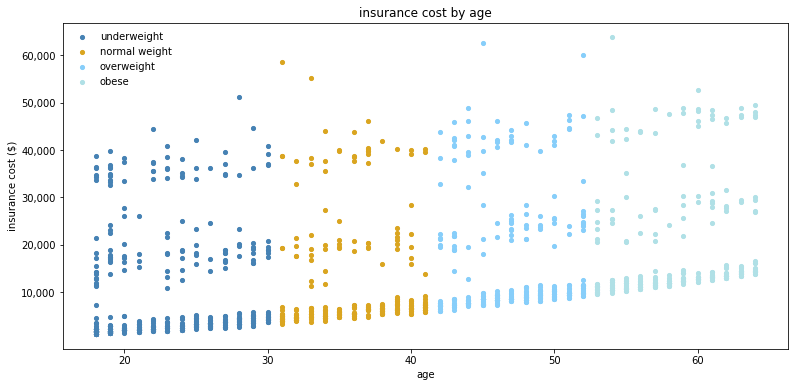

In [916]:
# age groups
g1 = insurance.age[(insurance.age >= 18) & (insurance.age <= 30)]
g2 = insurance.age[(insurance.age >= 31) & (insurance.age <= 41)]
g3 = insurance.age[(insurance.age >= 42) & (insurance.age <= 52)]
g4 = insurance.age[(insurance.age >= 53) & (insurance.age <= 64)]

# insurance cost of each age group
g1_cost = insurance.charges[(insurance.age >= 18) & (insurance.age <= 30)]
g2_cost = insurance.charges[(insurance.age >= 31) & (insurance.age <= 41)]
g3_cost = insurance.charges[(insurance.age >= 42) & (insurance.age <= 52)]
g4_cost = insurance.charges[(insurance.age >= 53) & (insurance.age <= 64)]

ages = [g1, g2, g3, g4]
costs = [g1_cost, g2_cost, g3_cost, g4_cost]
colors = ['steelblue', 'goldenrod', 'lightskyblue', 'powderblue']
labels = ['underweight', 'normal weight', 'overweight', 'obese']

f, ax = plt.subplots(1, 1,figsize=(13,6))
for age, cost, color, label in zip(ages, costs, colors, labels):
    ax.scatter(age, cost, color= color, label= label, s=17)

ax.set(title= 'insurance cost by age', xlabel= 'age', ylabel= 'insurance cost ($)')

ax.legend(frameon= False, loc= 'best')
ax.set_yticks([x*10000 for x in range(1, 7)])
ax.set_yticklabels(['{:,}'.format(x*10000) for x in range(1,7)])

plt.show()


as the age of the patient increases, the insurance cost increases as well. We can see that the oldest group has the highest insurance cost compared to the other young groups which may suggests that *patient's age and insurance cost are related*.

maybe the older the patient, the more diseases they have or maybe they like to take care of themselves!

the four age groups approximately have the same size, with the youngest group being slightly the largest.

now let's visualize the average insurance cost of the four age groups:

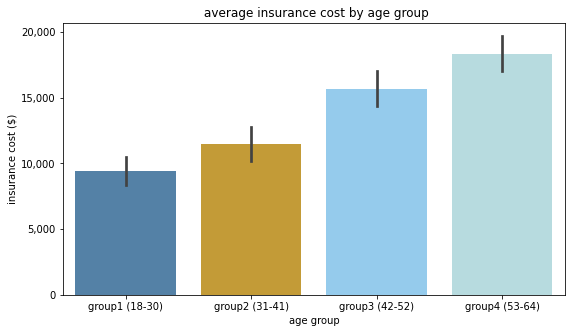

In [917]:
# creating 'age group' column
conditions = [
    (insurance['age'] >= 18) & (insurance['age'] <= 30),
    (insurance['age'] >= 31) & (insurance['age'] <= 41),
    (insurance['age'] >= 42) & (insurance['age'] <= 52),
    (insurance['age'] >= 53) & (insurance['age'] <= 64)]
values = ['group1 (18-30)', 'group2 (31-41)', 'group3 (42-52)', 'group4 (53-64)']
insurance['age group'] = np.select(conditions, values)

# plotting "average" insurance cost by age groups
f, ax = plt.subplots(1, 1,figsize=(9,5))
age_order = ['group1 (18-30)', 'group2 (31-41)', 'group3 (42-52)', 'group4 (53-64)']
colors = ['steelblue', 'goldenrod', 'lightskyblue', 'powderblue']
sns.barplot(x= 'age group', y= 'charges', data= insurance, order= age_order, palette= colors)
ax.set(title= ' average insurance cost by age group', xlabel= 'age group', ylabel= 'insurance cost ($)')
ax.set_yticks([x*1000 for x in range(0, 21, 5)])
ax.set_yticklabels(['{:,}'.format(x*1000) for x in range(0, 21, 5)])
plt.show()

the average insurance cost increases with every age group, with the highest cost being paied by the oldest age group.

let's check if the relationship between patient's age and insurance cost is linear or monotonic using covarience, pearson correlation for the first and spearman correlation for the second:

covariance measures the strength of a *linear* relationship between two variables, its value can range from negative to positive infinity. A + value indicates that larger values of one variable are associated with larger values of the other. A - value indicates that larger values of one variable are associated with smaller values of the other. A zero covariance value means that there is no *linear* relationship between the two variables, but there could be another *non-linear* relationship between them.

pearson correlation tests for *linear* relationship between two variables. In other words,  it tests for two variables moving in the same direction in a constant rate. Pearson cofficient has a value between -1 and 1. The sign of the cofficient indicates the direction of the relationship between the two variables. A + coefficient means that both variables tend to increase together, whereas a - coefficient means that as one variable increases, the other decreases.

The value of the coefficient is indicative of the strength of the *linear* relationship between the two variables (we are aiming *at least* for a cofficient value > 0.3, the closer to 1 the better!). A cofficient of value zero means that there is no *linear* relationship, but there could be another *non-linear* relationship between the two variables.

spearman correlation follows the same logic, though it tests for a *monotonic* relationship between two variables that is two variable moving in the same direction, but not necessarily at a constant rate. Spearman cofficient also has a range between -1 and 1.

also, I will be reporting the p-value of each correlation to confirm if what we are observing in our data sample is representative of the population and not just a mere concidence.

In [918]:
# covariance 
cov = np.cov(insurance.age , insurance.charges)
print('covariance:')
print(round((cov[0][1]), 1),'\n')

# pearson correlation 
corr, p = stat.pearsonr(insurance.age, insurance.charges)
print('pearson correlation:')
print('coefficient:', round(corr, 2))
print('p-value:', pval, '\n')

# spearman correlation
corr, pval = stat.spearmanr(insurance.bmi, insurance.charges)
print('spearman correlation:')
print('coefficient:', round(corr, 2))
print('p-value: {:.5f}'.format(pval))

covariance:
50874.8 

pearson correlation:
coefficient: 0.3
p-value: 0.9328921288772233 

spearman correlation:
coefficient: 0.12
p-value: 0.00001


covariance: the large positive value indicates that higher insurance costs are associated with older patients.

pearson correlation: pearson coefficient value means that there is relatively weak *linear* relationship between age and insurance cost. The positive sign of the coefficient indicates that as patient's age increase, so does the insurance cost.
At a significance level of 0.05, p-value is significant meaning that there is a significant correlation between patient's age and insurance cost in the population.

spearman correlation: spearman coefficient value means that there is a weak *monotonic* relationship between age and insurance cost. The positive sign of the coefficient indicates that as patient's age increase, so does the insurance cost.
At a significance level of 0.05, p-value is significant meaning that there is a significant correlation between patient's age and insurance cost in the population.

#### Is patient's age and insurance cost associated?

to test for association between age and insurance cost of a patient, I will run **ANOVA** test, with the following hypotheses:

**H0:** There is *no* difference in insurance cost between patients in different age groups.

**H1:** There *is* a difference in insurance cost between at least one pair of age groups.


In [919]:
# ANOVA
fstat, pval = stat.f_oneway(g1_cost, g2_cost, g3_cost, g4_cost)
print('p-value of ANOVA test:', pval)

p-value of ANOVA test: 7.065042403114954e-26


At a significance level of 0.05, there is a significant association between at least one pair of age groups and insurance cost. In order to know which pair(s) of age groups they are, I will use **Tukey's range** test:

In [920]:
# Tukey's range test
print(pairwise_tukeyhsd(insurance.charges, insurance['age group'], 0.05))

           Multiple Comparison of Means - Tukey HSD, FWER=0.05            
    group1         group2      meandiff p-adj    lower     upper    reject
--------------------------------------------------------------------------
group1 (18-30) group2 (31-41) 2052.9883 0.0914 -212.2373  4318.2139  False
group1 (18-30) group3 (42-52) 6234.8845  0.001 4032.5233  8437.2457   True
group1 (18-30) group4 (53-64) 8904.5896  0.001 6672.0521 11137.1271   True
group2 (31-41) group3 (42-52) 4181.8962  0.001 1736.8724  6626.9201   True
group2 (31-41) group4 (53-64) 6851.6013  0.001 4379.3613  9323.8413   True
group3 (42-52) group4 (53-64) 2669.7051 0.0234  254.9342  5084.4759   True
--------------------------------------------------------------------------


from the table above and at a significance level of 0.05, there is a significant association between age and insurance cost in the following pairs: group4/group1, group4/group2, group4/group3, group3/group1 and group3/group2 (That's five out of six pairs!). The first three pairs included group 4, which is the oldest group of patients we have in the data, and the last two pairs included group 3, the second oldest group.
> <span style= 'color:goldenrod'> **There is an association between patient's age and insurance cost** </span>

### gender and insurance cost

To count the number of patients by gender and their proportions. Also, points which gender represents the majority in the given data:

In [921]:
patients.gender_counter()

There are 662 (49.48%) female patients and 676 (50.52%) male patients.

male patients are more than female patients by 1.05%.


calculating average insurance cost by gender and determine which gender pays higher insurance cost:

In [922]:
patients.gender_costs()

The average insurance cost for females is $12,569.58.
The average insurance cost for males is $13,956.75.


Male patients tend to have a higher average insurance cost compared to females.


#### Is there an association between patient's gender and the insurance cost that they pay?

Let's start by plotting insurance cost of both genders:

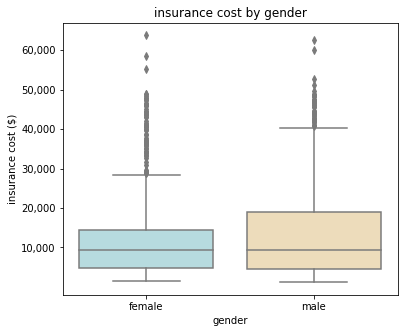

In [923]:
# plotting female vs. male insurance costs
f, ax= plt.subplots(1, 1, figsize=(6,5))
sns.boxplot(data= insurance, x= 'sex', y= 'charges', palette= ['powderblue', 'wheat'])
ax.set(title= 'insurance cost by gender', xlabel= 'gender', ylabel= 'insurance cost ($)')
ax.set_yticks([x*10000 for x in range(1, 7)])
ax.set_yticklabels(['{:,}'.format(x*10000) for x in range(1,7)])
plt.show()

from the figure, we see that there is a great overlap between the two boxes which suggests that there isn't much difference in insurance cost paied by both genders. This could mean that there is no association between gender and insurance cost, however we need to prove it statistically.

to check for the association between gender and insurance cost, I will be using **two-sample T-test** with the following hypotheses:

**H0:** There is *no* difference in insurance cost of females and males.

**H1:** There *is* a difference in insurance cost of females and males.


Assuming that the data was randomly collected,

I will calculate standard deviation ratio of insurance cost for both genders (we are aiming for a value close to 1), then I will check for its distribution:

standard deviation ratio = 0.9


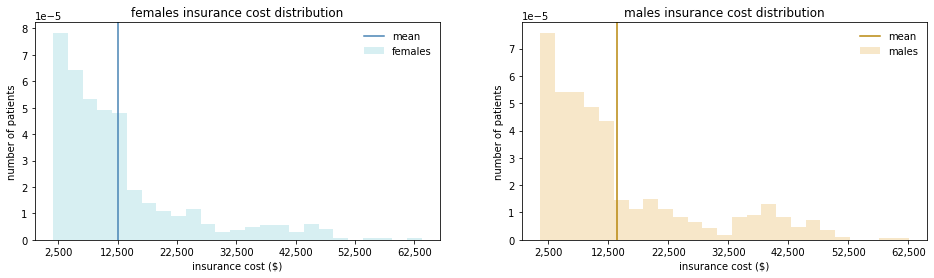

In [924]:
# getting insurance cost for each gender
female_cost = insurance.charges[insurance.sex == 'female']
male_cost = insurance.charges[insurance.sex == 'male']

# standard deviation ratio
ratio = (np.std(female_cost)/np.std(male_cost))
print('standard deviation ratio =', round(ratio, 1))

# plotting histograms for insurance cost of females and males
f, (ax1, ax2)= plt.subplots(1, 2, figsize=(16,4))

# females insurance cost distribution
ax1.hist(female_cost, alpha= 0.5, label= 'females', density= True, bins= 25, color= 'powderblue')
ax1.set(title= 'females insurance cost distribution', xlabel= 'insurance cost ($)', ylabel= 'number of patients')
ax1.axvline(x= np.mean(female_cost), label= 'mean', color = 'steelblue')
ax1.set_xticks([x*10000 for x in np.arange(0.25,7, 1)])
ax1.set_xticklabels(['{:,}'.format(int(x*10000)) for x in np.arange(0.25,7, 1)])
ax1.legend(frameon= False, loc= 'best')

# males insurance cost distribution
ax2.hist(male_cost, alpha= 0.7, label= 'males', density= True, bins= 25, color= 'wheat')
ax2.set(title= 'males insurance cost distribution', xlabel= 'insurance cost ($)', ylabel= 'number of patients')
ax2.axvline(x= np.mean(male_cost), label= 'mean', color = 'darkgoldenrod')
ax2.set_xticks([x*10000 for x in np.arange(0.25,7, 1)])
ax2.set_xticklabels(['{:,}'.format(int(x*10000)) for x in np.arange(0.25,7, 1)])
ax2.legend(frameon= False, loc= 'best')

plt.show()

stanadrad deviation ratio: 0.9 is close to 1

distribution: insurance cost distribution of both genders is right-skewed.
For this reason, I will use log transformation to have a normal distribution and meet two-side T-test condition:

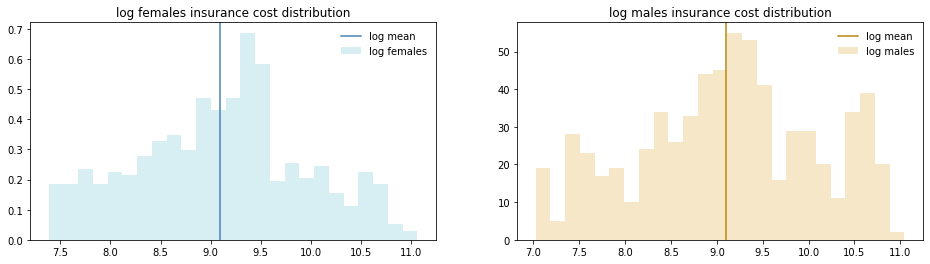

In [925]:
# log transformation
log_female_cost = np.log(female_cost)
log_male_cost = np.log(male_cost)

# re-plotting histograms
f, (ax1, ax2)= plt.subplots(1, 2, figsize=(16,4))

# logged females insurance cost distribution
ax1.hist(log_female_cost, alpha= 0.5, label= 'log females', density= True, bins= 25, color= 'powderblue')
ax1.set(title= 'log females insurance cost distribution')
ax1.axvline(x= np.mean(log_female_cost), label= 'log mean', color = 'steelblue')
ax1.legend(frameon= False, loc= 'best')

# logged males insurance cost distribution
ax2.hist(log_male_cost, alpha= 0.7, label= 'log males', bins= 25, color= 'wheat')
ax2.set(title= 'log males insurance cost distribution')
ax2.axvline(x= np.mean(log_male_cost), label= 'log mean', color = 'darkgoldenrod')
ax2.legend(frameon= False, loc= 'best')

plt.show()

distribution: insurance cost for both genders is normally distributed

Now, we can proceed with our two-sample T-test and taking a significant threshold of 0.05:

In [926]:
# two sample T-Test
sig_threshold = 0.05

tsta, pval = stat.ttest_ind(log_female_cost, log_male_cost)

if pval < sig_threshold:
    print('P-value of two sample T-test:', round(pval,2), '< significant threshold (0.05)')
    print('There is an association between insurance cost and gender,\n\
as there is a significant difference in insurance cost of females and males.')
else:
    print('P-value of two sample T-test:', round(pval,2), '> significant threshold (0.05)\n')
    print('There is no association between insurance cost and gender,\n\
as there is no significant difference in insurance cost of females and males.') 
    

P-value of two sample T-test: 0.84 > significant threshold (0.05)

There is no association between insurance cost and gender,
as there is no significant difference in insurance cost of females and males.


The two-sample T-test p-value (0.84) is greater than the significant threshold of 0.05. Therefore, the null hypothesis is *true* and we conclude that indeed
> <span style= 'color:goldenrod'> **There is no association between insurance cost and gender** </span>

### BMI and insurance cost

First, patients are divided into four groups based on their BMI (body mass index):
- underweight (BMI less than 18.5)
- normal weight (18.5 ≤ BMI < 25)
- overweight (25 ≤ BMI < 30)
- obese (BMI more than 30)

Then, the method counts the number of patients in each BMI group, their proportions, calculates the average insurance cost and determines which BMI group has the lowest and highest insurance cost:

In [927]:
patients.bmi_cost()

Underweight group (BMI < 18.5):
number of patients: 20 (1.49%) 		 average insurance cost: $8,852.2.


Normal weight group (18.5 ≤ BMI < 25):
number of patients: 225 (16.82%) 	 average insurance cost: $10,409.34.


Overweight group (25 ≤ BMI < 30):
number of patients: 386 (28.85%) 	 average insurance cost: $10,987.51.


Obese group (BMI ≥ 30):
number of patients: 707 (52.84%) 	 average insurance cost: $15,552.34.


underwight patients have the lowest average insurance cost.


obese patients have the highest average insurance cost.


From the analysis above, we see that as the BMI increases, the average insurance cost increases too. This suggests that *patient's BMI and insurance cost are related*.
> More than half of the patients in the data are obese, and it is known that obesity is related to several diseases such as diabetes, cardiovascular diseases, hypertension, dyslipidemia (low LDL, high HDL and triglycerides) and much more. 
As a recommendation for those patients to cut down their insurance cost, is to reduce their BMI through diet and exercise.

#### What's the relationship between patient's BMI and the insurance cost  that they pay?

Let's start by plotting insurance cost of patients divided by their BMI group:

In [928]:
# insurance cost of each BMI group
uw_cost = insurance.charges[insurance.bmi < 18.5]
nor_cost = insurance.charges[(insurance.bmi >= 18.5) & (insurance.bmi < 25)]
ow_cost = insurance.charges[(insurance.bmi >= 25) & (insurance.bmi < 30)]
ob_cost = insurance.charges[insurance.bmi >= 30]

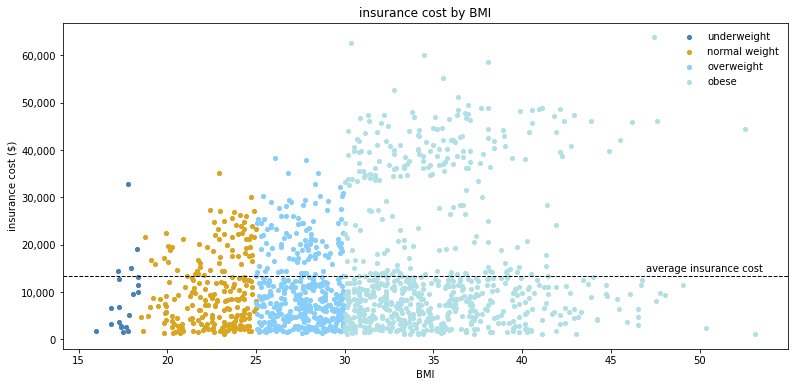

In [929]:
# plotting insurance cost by BMI group
bmi_groups = [insurance.bmi[insurance.bmi < 18.5], insurance.bmi[(insurance.bmi >= 18.5) & (insurance.bmi < 25)], insurance.bmi[(insurance.bmi >= 25) & (insurance.bmi < 30)], insurance.bmi[insurance.bmi >= 30]]
bmi_costs = [uw_cost, nor_cost, ow_cost, ob_cost]
colors = ['steelblue', 'goldenrod', 'lightskyblue', 'powderblue']
labels = ['underweight', 'normal weight', 'overweight', 'obese']

f, ax = plt.subplots(1, 1,figsize=(13,6))
for bmi_group, cost, color, label in zip(bmi_groups, bmi_costs, colors, labels):
    ax.scatter(bmi_group, cost, color= color, label= label, s=17)

ax.axhline(np.mean(insurance.charges), color= 'black', linewidth= 1, linestyle= 'dashed')
ax.text(47, np.mean(insurance.charges)+ 1000, 'average insurance cost')
ax.set(title= 'insurance cost by BMI', xlabel= 'BMI', ylabel= 'insurance cost ($)')

ax.legend(frameon= False, loc= 'best')
ax.set_yticks([x*10000 for x in range(0, 7)])
ax.set_yticklabels(['{:,}'.format(x*10000) for x in range(0,7)])
plt.show()

as we determined earlier, more than 50% of the patients in the data are obese. The number of patients in one BMI group is higher than the former BMI group (number of patients: underweight < normal weight < overweight < obese) and so does those who are paying higher insurance cost than the average.

now, let's plot the average insurance cost each BMI group pays:

In [930]:
# creating 'bmi group' column
conditions = [
    (insurance['bmi'] < 18.5),
    (insurance['bmi'] >= 18.5) & (insurance['bmi'] < 25),
    (insurance['bmi'] >= 25) & (insurance['bmi'] < 30),
    (insurance['bmi'] >= 30)]
values = ['underweight', 'normal weight', 'overweight', 'obese']
insurance['bmi group'] = np.select(conditions, values)
insurance.head()

,age,sex,bmi,children,smoker,region,charges,age group,bmi group
0,19,female,27.900,0,yes,southwest,16884.92400,group1 (18-30),overweight
1,18,male,33.770,1,no,southeast,1725.55230,group1 (18-30),obese
2,28,male,33.000,3,no,southeast,4449.46200,group1 (18-30),obese
3,33,male,22.705,0,no,northwest,21984.47061,group2 (31-41),normal weight
4,32,male,28.880,0,no,northwest,3866.85520,group2 (31-41),overweight


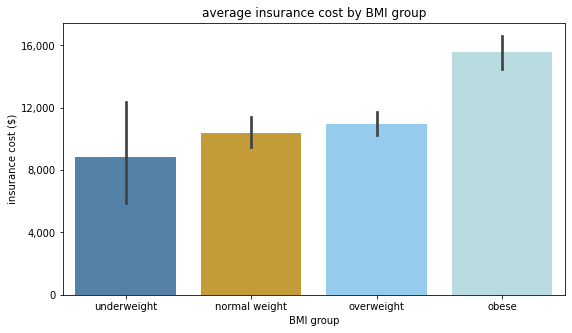

In [931]:
# plotting "average" insurance cost by BMI group
f, ax = plt.subplots(1, 1,figsize=(9,5))
bmi_order = ['underweight', 'normal weight', 'overweight', 'obese']
colors = ['steelblue', 'goldenrod', 'lightskyblue', 'powderblue']
sns.barplot(x= 'bmi group', y= 'charges', data= insurance, order= bmi_order, palette= colors)
ax.set(title= 'average insurance cost by BMI group', xlabel= 'BMI group', ylabel= 'insurance cost ($)')
ax.set_yticks([x*1000 for x in range(0, 17, 4)])
ax.set_yticklabels(['{:,}'.format(x*1000) for x in range(0, 17, 4)])
plt.show()

the average insurance cost increases as the BMI increase.

now, let's quantifiy the relationship between patient's BMI and insurance cost by calculating covariance and correlation. I will be using pearson correlation to check for the strength of a linear relationship and spearman correlation to check for a monotonic relationship between the two variables:

In [932]:
# covariance 
cov = np.cov(insurance.bmi , insurance.charges)
print('covariance:')
print(round((cov[0][1]), 1),'\n')

# pearson correlation 
corr, pval = stat.pearsonr(insurance.bmi, insurance.charges)
print('pearson correlation:')
print('coefficient:',round(corr, 2))
print('p-value:', pval, '\n')

# spearman correlation
corr, pval = stat.spearmanr(insurance.bmi, insurance.charges)
print('spearman correlation:')
print('coefficient:', round(corr, 2))
print('p-value: {:.5f}'.format(pval))


covariance:
14647.3 

pearson correlation:
coefficient: 0.2
p-value: 2.459085535117846e-13 

spearman correlation:
coefficient: 0.12
p-value: 0.00001


covariance: large positive value indicates that the higher BMI of a patient, the higher the insurance cost they pay.

pearson correlation: pearson coefficient indicates a very weak *linear* correlation between patient's BMI and insurance cost. This doesn't mean that there is no correlation between BMI and insurance cost, only that there is no *linear* correlation between them. The coefficient is positive meaning that as BMI increases, insurance cost increases too. At a significance level of 0.05, p-value is significant. There is a significant correlation between BMI and insurance cost in the population.


spearman correlation: spearman coefficient indicates a very weak *monotonic* correlation between BMI and insurance cost. The positive value denotes that as BMI increase, insurance cost increase too.
At a significance level of 0.05, p-value is significant - spearman coefficient is significant. There is a significant correlation between BMI and insurance cost in the population.


#### Is patient's BMI and insurance cost associated?

to test for association between the two variables, I will run **ANOVA** test, with the following hypotheses:

**H0:** There is *no* difference in insurance cost between patients' BMI groups.


**H1:** There *is* a difference in insurance cost between at least one pair of BMI groups.



In [933]:
# ANOVA
fstat, pval = stat.f_oneway(uw_cost, nor_cost, ow_cost, ob_cost)
print('p-value of ANOVA test:', pval)

p-value of ANOVA test: 6.66279768069733e-12


At a significance level of 0.05, there is a significant association between at least one pair of BMI groups and insurance cost. In order to know which pair(s) of BMI groups they are, I will use **Tukey's range** test:

In [934]:
# Tukey's range test
print(pairwise_tukeyhsd(insurance.charges, insurance['bmi group'], 0.05))

           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
    group1       group2    meandiff  p-adj     lower      upper    reject
-------------------------------------------------------------------------
normal weight       obese  5142.9978  0.001   2804.7037  7481.2919   True
normal weight  overweight   578.1722    0.9  -1984.1152  3140.4596  False
normal weight underweight -1557.1371    0.9  -8685.1574  5570.8832  False
        obese  overweight -4564.8256  0.001  -6498.1239 -2631.5273   True
        obese underweight -6700.1349 0.0623 -13626.9667   226.6969  False
   overweight underweight -2135.3093 0.8451  -9140.9282  4870.3096  False
-------------------------------------------------------------------------


There is a significant difference in insurance cost between patients with normal weight and obese, and overweight and obese (p-value = 0.001)
> <span style= 'color:goldenrod'> **There is an association between patient's BMI and insurance cost** </span>

### number of children and insurance cost

The method below returns a dictionary that includes the following:
- key: number of children from smallest to largest
- value: a list; containing the average insurance cost paid by patients with the corresponding number of children and their count

It also determines which number of patient's children are associated with lowest and highest average insurance cost:

In [935]:
patients.children_cost()

{0: [12365.98, '574 patients'], 1: [12731.17, '324 patients'], 2: [15073.56, '240 patients'], 3: [15355.32, '157 patients'], 4: [13850.66, '25 patients'], 5: [8786.04, '18 patients']} 

The highest average insurance cost is $15,355.32 for patients with 3 children.

The lowest average insurance cost is $0 for patients with 0 children.



#### What's the relationship between patient's children number and the insurance cost they pay?

Let's plot insurance cost of patients per number of children. First, let's start by dividing patients into three groups based on their number of children: patients with no children, patients with one to three children and patients with more than three children:

In [936]:
# creating 'offspring group' column
conditions = [
    (insurance['children'] == 0),
    (insurance['children'] >= 1) & (insurance['children'] <= 3),
    (insurance['children'] > 3)]
values = ['no children', '1-3 children', '>3 children']
insurance['offspring group'] = np.select(conditions, values)
insurance.head()

,age,sex,bmi,children,smoker,region,charges,age group,bmi group,offspring group
0,19,female,27.900,0,yes,southwest,16884.92400,group1 (18-30),overweight,no children
1,18,male,33.770,1,no,southeast,1725.55230,group1 (18-30),obese,1-3 children
2,28,male,33.000,3,no,southeast,4449.46200,group1 (18-30),obese,1-3 children
3,33,male,22.705,0,no,northwest,21984.47061,group2 (31-41),normal weight,no children
4,32,male,28.880,0,no,northwest,3866.85520,group2 (31-41),overweight,no children


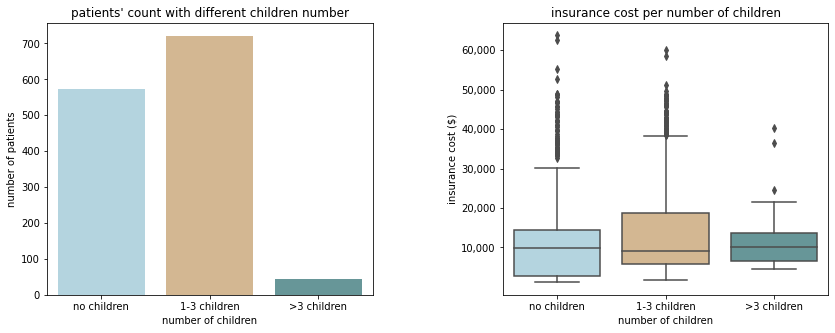

In [937]:
# plotting insurance cost of patients with different number of children
f, ax= plt.subplots(1, 2, figsize=(14, 5))
sns.countplot(data = insurance, x= 'offspring group', palette= ['lightblue', 'burlywood', 'cadetblue'], ax= ax[0])
ax[0].set(title= 'patients\' count with different children number', xlabel= 'number of children', ylabel= 'number of patients')

sns.boxplot(data= insurance, x= 'offspring group', y= 'charges', palette= ['lightblue', 'burlywood', 'cadetblue'] ,ax= ax[1])
ax[1].set(title= 'insurance cost per number of children', xlabel= 'number of children', ylabel= 'insurance cost ($)')
ax[1].set_yticks([x*10000 for x in range(1, 7)])
ax[1].set_yticklabels(['{:,}'.format(x*10000) for x in range(1,7)])
plt.subplots_adjust(wspace=0.4)
plt.show()

From the figure on the left, the majority of patients in our data have one to three children. From the figure on the right, the first two patient groups have alot of outliers meaning that alot of patients with no children and those who with one to three children pay insurance cost higher than the majority of patients in their group. The median of the three patient groups is similar. There is some overlap between the boxes, but we can't depend only on visualization to draw conclusions about the association of the two variables.

#### Is the number of children a patient has and the insurance cost they pay associated?

we are going to calculate mean and median insurance cost differences for the three groups

In [938]:
# getting insurance cost for each group based on their children number
no_child_cost = insurance.charges[insurance['offspring group'] == 'no children']
one_to_three_child_cost = insurance.charges[insurance['offspring group'] == '1-3 children']
more_3_child_cost = insurance.charges[insurance['offspring group'] == '>3 children']

# mean insurance cost differences
g1g2_mean_diff = abs(np.mean(no_child_cost) - np.mean(one_to_three_child_cost))
g1g3_mean_diff = abs(np.mean(no_child_cost) - np.mean(more_3_child_cost))
g2g3_mean_diff = abs(np.mean(one_to_three_child_cost) - np.mean(more_3_child_cost))

print('mean insurance cost difference of patients with no children and 1-3 children: ${:,}.'.format(round(g1g2_mean_diff, 2)))
print('mean insurance cost difference of patients with no children and 3 and more children: ${:,}.'.format(round(g1g3_mean_diff, 2)))
print('mean insurance cost difference of patients with 1-3 children and 3 and more children: ${:,}.'.format(round(g2g3_mean_diff, 2)))
print('\n')

# median insurance cost differences
g1g2_median_diff = abs(np.median(no_child_cost) - np.median(one_to_three_child_cost))
g1g3_median_diff = abs(np.median(no_child_cost) - np.median(more_3_child_cost))
g2g3_median_diff = abs(np.median(one_to_three_child_cost) - np.median(more_3_child_cost))

print('median insurance cost difference of patients with no children and 1-3 children: ${:,}.'.format(round(g1g2_median_diff, 2)))
print('median insurance cost difference of patients with no children and 3 and more children: ${:,}.'.format(round(g1g3_median_diff, 2)))
print('median insurance cost difference of patients with 1-3 children and 3 and more children: ${:,}.'.format(round(g2g3_median_diff, 2)))

mean insurance cost difference of patients with no children and 1-3 children: $1,716.33.
mean insurance cost difference of patients with no children and 3 and more children: $635.39.
mean insurance cost difference of patients with 1-3 children and 3 and more children: $2,351.72.


median insurance cost difference of patients with no children and 1-3 children: $674.78.
median insurance cost difference of patients with no children and 3 and more children: $240.02.
median insurance cost difference of patients with 1-3 children and 3 and more children: $914.8.


The largest mean and median difference in insurance cost is between patients with 1-3 children and 3 and more children, followed by patients with no children and 1-3 children. Now let's use some statistics to confirm this association. I will be running **ANOVA** test with the following hypotheses:

**H0:** There is *no* difference in insurance cost of patients with different number of children.

**H1:** There *is* difference in insurance cost between at least one pair of patients with different number of children.

In [939]:
# ANOVA
sig_threshold = 0.05 
fstat, pval= stat.f_oneway(no_child_cost,one_to_three_child_cost, more_3_child_cost)

if pval < sig_threshold:
    print('p-value of ANOVA test:', round(pval, 2), '< significant threshold (0.05)\n')
    print('at least one pair of patients with different children number has significantly different insurance costs.')
else:
    print('p-value of ANOVA test:', round(pval, 2), '> significant threshold (0.05)\n')
    print('there is no significant different in insurance costs of between any pair of patients.')

p-value of ANOVA test: 0.03 < significant threshold (0.05)

at least one pair of patients with different children number has significantly different insurance costs.


At a significance level of 0.05, the p-value indicates that there is a significnt different in insurance cost of at least one pair of patients with different children number. Let's use **Tukey's range** test to determine which pair(s) has this significant difference:

In [940]:
# Tukey's range test
print(pairwise_tukeyhsd(insurance.charges, insurance['offspring group'], 0.05))

         Multiple Comparison of Means - Tukey HSD, FWER=0.05          
   group1       group2    meandiff  p-adj    lower      upper   reject
----------------------------------------------------------------------
1-3 children >3 children -2351.7199  0.432 -6803.6302 2100.1904  False
1-3 children no children -1716.3267 0.0302 -3302.7274  -129.926   True
 >3 children no children   635.3932    0.9 -3848.4869 5119.2734  False
----------------------------------------------------------------------


At a significance level of 0.05, there is one pair of patients that has a significant difference in insurance cost, that is patients with no children and patients with 1-3 children (p-value = 0.03)
> <span style= 'color:goldenrod'> **There is an association between children's number a patient has and their insurance cost** </span>


### smoking status vs insurance cost
to count the number of patients who are smokers and non-smokers, their proprtions, calculate the average insurance cost for both groups and determine which smoking status is linked to higher insurance cost:

In [941]:
patients.smoking_cost()

Patients who are smokers:
number of patients: 274 (20.48%) 	 average insurance cost: $32,050.23.


Patients who are non-smokers:
number of patients: 1064 (79.52%) 	 average insurance cost: $8,434.27.


smokers have higher insurance costs than non-smokers.


#### Is patient's smoking status and their insurance cost associated?

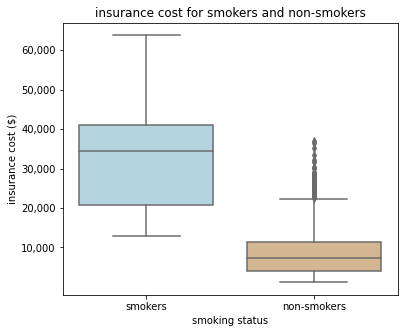

In [942]:
# plotting insurance cost of smokers and non-smokers
f, ax= plt.subplots(1, 1, figsize=(6,5))
sns.boxplot(data= insurance, x= 'smoker', y= 'charges', palette= ['lightblue', 'burlywood'])
ax.set(title= 'insurance cost for smokers and non-smokers', xlabel= 'smoking status', ylabel= 'insurance cost ($)')
ax.set_xticklabels(['smokers', 'non-smokers'])
ax.set_yticks([x*10000 for x in range(1, 7)])
ax.set_yticklabels(['{:,}'.format(x*10000) for x in range(1,7)])
plt.show()

from the figure, smokers pay higher insurance cost compared to non-smokers. The median insurance cost of smokers is higher than non-smoker's insurance cost median.

Non-smokers box has alot of outliers, meaning that a lot of non-smokers pay 'higher' insurance costs compared to their counterparts.

The two boxes don't overlap suggesting that there is a strong association between patient's smoking status and insurance cost. Now, let's check mean and median differences:

In [943]:
# mean and median differeances
smokers_cost = insurance.charges[insurance.smoker == 'yes']
non_smokers_cost = insurance.charges[insurance.smoker == 'no']

mean_diff = np.mean(smokers_cost) - np.mean(non_smokers_cost)
median_diff = np.median(smokers_cost) - np.median(non_smokers_cost)
print('mean insurance cost difference: ${:,}.'.format(round(mean_diff, 2)))
print('median insurance cost differeance: ${:,}.'.format(round(median_diff, 2)))

mean insurance cost difference: $23,615.96.
median insurance cost differeance: $27,110.94.


mean and median insurance cost differences are both large, confirming the association between patient's smoking status and insurance cost. Another way to check the assoication is through plotting histograms for insurance cost of smokers and non-smokers:

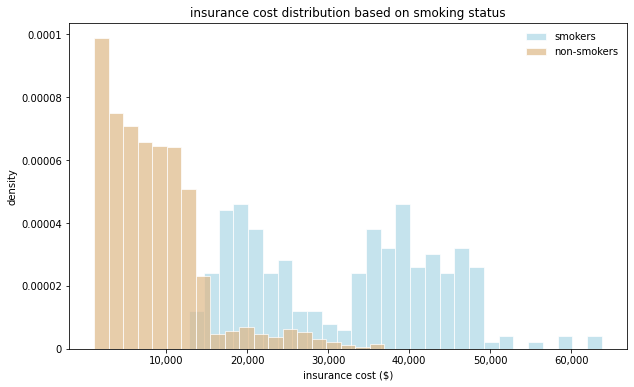

In [944]:
# plotting insurance cost distribution of smokers and non-smokers
f, ax= plt.subplots(1, 1,figsize=(10,6))

ax.hist(smokers_cost, label= 'smokers', alpha= 0.7, density= True, bins= 28, color= 'lightblue', edgecolor= 'white')
ax.hist(non_smokers_cost, label= 'non-smokers', alpha= 0.7, density= True, bins= 20, color= 'burlywood', edgecolor= 'white')
ax.set(title= 'insurance cost distribution based on smoking status', xlabel= 'insurance cost ($)', ylabel= 'density')
ax.set_xticks([x*10000 for x in range(1, 7)])
ax.set_xticklabels(['{:,}'.format(x*10000) for x in range(1,7)])
ax.set_yticks([(x/100000) for x in range(0,11,2)])
ax.set_yticklabels(['0', '0.00002', '0.00004', '0.00006', '0.00008', '0.0001'])
plt.legend(frameon= False)
plt.show()

from the figure, we see that smokers' histogram barely overlaps with the non-smokers' histogram (agrees with side by side boxes figure). The distribution of non-smokers' insurance cost is unimodal and right-skewed, while the distribution of smokers' insurance cost is bimodal.
> <span style= 'color:goldenrod'> **There is an association between smoking status and insurance cost** </span>

### regions and insurance cost

In this section, there are mutliple methods to be used for different purposes. The first method is used to check unique regions in the data without using Numpy library as we did above:

In [945]:
patients.unique_regions()

['southwest', 'southeast', 'northwest', 'northeast']


to count the number of patients in each unique region:

In [946]:
patients.region_counter()

There are 325 patients in northwest, 325 patients in southwest, 324 patients in northeast and 364 in southeast.


to get the number of patients in a specific region by an input prompoted by the user:

for example, if we want to know the number of patients who are from northwest:

In [947]:
patients.patient_by_region('northwest')


325

repeating the same for southwest, northeast and southeast:

In [948]:
patients.patient_by_region('southwest')

325

In [949]:
patients.patient_by_region('northeast')

324

In [950]:
patients.patient_by_region('southeast')

364

to count the average insurance cost per region. This method returns a *dictionary* ordered by insurance cost, from lowest to highest:

In [951]:
patients.region_cost()

Average insurance cost by region from lowest to heighest:
{'southwest': '$12,346.94', 'northwest': '$12,417.58', 'northeast': '$13,406.38', 'southeast': '$14,735.41'}


this method is smiliar to the one above, although it provides more information. It counts the number of patients in each region, their proportions, calculates the average insurance cost, determines regions with lowest and highest insurance cost:

In [952]:
patients.comprehensive_region_cost()

In northwest:
number of patients: 325 (24.29%) 	 average insurance cost: $12,417.58.


In southwest:
number of patients: 325 (24.29%) 	 average insurance cost: $12,346.94.


In northeast:
number of patients: 324 (24.22%) 	 average insurance cost: $13,406.38.


In southeast:
number of patients: 364 (27.20%) 	 average insurance cost: $14,735.41.


southwest has the lowest average insurance costs.


southeast has the heighest average insurance costs.


#### Is patient's region and the insurance cost they pay associated?

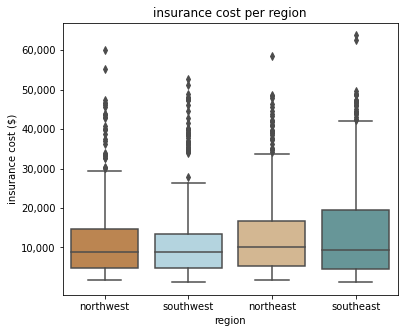

In [953]:
# plotting insurance cost of the four regions
f, ax = plt.subplots(1, 1, figsize=(6,5))
sns.boxplot(data= insurance, x= 'region', y= 'charges', palette= ['peru', 'lightblue','burlywood','cadetblue'], order=['northwest','southwest', 'northeast', 'southeast'])
ax.set(title= 'insurance cost per region', ylabel= 'insurance cost ($)')
ax.set_yticks([x*10000 for x in range(1, 7)])
ax.set_yticklabels(['{:,}'.format(x*10000) for x in range(1,7)])
plt.show()

from the figure above, the four regions have a slightly similar median insurance cost and all of them have outliers paying higher insurance cost than the majority.

southeast has some outliers paying very high insurance cost. There is pairwise differences between the boxses which suggest that there might be an association to be confirmed statistically between region and insurance cost.

For this purpose, I will run **ANOVA** test assuming that the data was randomly collected.

**H0:** There is *no* difference in insurance cost of the four regions.

**H1:** There *is* a difference in insurance cost between at least one pair of regions.

I will be checking standard deviation ratio of insurance cost of different regions (aiming for a value close to 1) and their distribution:


In [954]:
# insurance cost of the four regions
nw = insurance.charges[insurance.region == 'northwest']
sw = insurance.charges[insurance.region == 'southwest']
ne = insurance.charges[insurance.region == 'northeast']
se = insurance.charges[insurance.region == 'southeast']

# standard deviation ratios
print('standard deviation ratios:')
print('nw/ne cost std ratio:',round(np.std(nw)/np.std(ne), 1))
print('nw/sw cost std ratio:',round(np.std(nw)/np.std(sw), 1))
print('nw/se cost std ratio:',round(np.std(nw)/np.std(se), 1))
print('sw/ne cost std ratio:',round(np.std(sw)/np.std(ne), 1))
print('sw/se cost std ratio:',round(np.std(sw)/np.std(se), 1))
print('ne/se cost std ratio:',round(np.std(ne)/np.std(se), 1))

standard deviation ratios:
nw/ne cost std ratio: 1.0
nw/sw cost std ratio: 1.0
nw/se cost std ratio: 0.8
sw/ne cost std ratio: 1.0
sw/se cost std ratio: 0.8
ne/se cost std ratio: 0.8


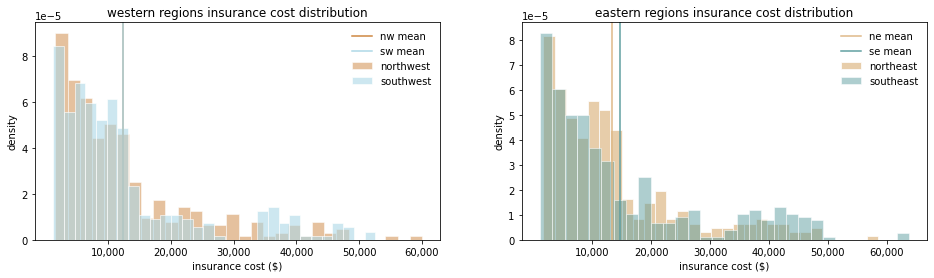

In [955]:
# insurance cost distribution of the four regions
f, (ax1, ax2)= plt.subplots(1, 2, figsize=(16,4))

# western regions insurance cost distribution
ax1.hist(nw, alpha= 0.5, label= 'northwest', bins= 30, density= True, color= 'peru', edgecolor= 'white')
ax1.hist(sw, alpha= 0.6, label= 'southwest', bins= 30, density= True, color= 'lightblue', edgecolor= 'white')
ax1.set(title= 'western regions insurance cost distribution', xlabel= 'insurance cost ($)', ylabel= 'density')
ax1.axvline(x= np.mean(nw), color= 'peru', label= 'nw mean')
ax1.axvline(x= np.mean(sw), color= 'lightblue', label= 'sw mean')
ax1.set_xticks([x*10000 for x in range(1,7)])
ax1.set_xticklabels(['{:,}'.format(x*10000) for x in range(1,7)])
ax1.legend(frameon= False, loc= 'best')

# estern regions insurance cost distribution
ax2.hist(ne, alpha= 0.7, label= 'northeast', density= True, bins= 30, color= 'burlywood', edgecolor= 'white')
ax2.hist(se, alpha= 0.5, label= 'southeast', density= True, bins= 30, color= 'cadetblue', edgecolor= 'white')
ax2.set(title= 'eastern regions insurance cost distribution', xlabel= 'insurance cost ($)', ylabel= 'density')
ax2.axvline(x= np.mean(ne), color= 'burlywood', label= 'ne mean')
ax2.axvline(x= np.mean(se), color= 'cadetblue', label= 'se mean')
ax2.set_xticks([x*10000 for x in range(1,7)])
ax2.set_xticklabels(['{:,}'.format(x*10000) for x in range(1,7)])
ax2.legend(frameon= False, loc= 'best')

plt.show()


# Note: northwest and southeast insurance means are very close to each other ($70.64 apart).
# in 'western regions insurance cost distribution' figure, the two lines will look as if they overlap.

stanadrad deviation ratios: close to 1.

distribution: insurance cost distribution for all four regions is right-skewed. For this reason, I will use log transformation to have a normal distribution and meet ANOVA's condition:

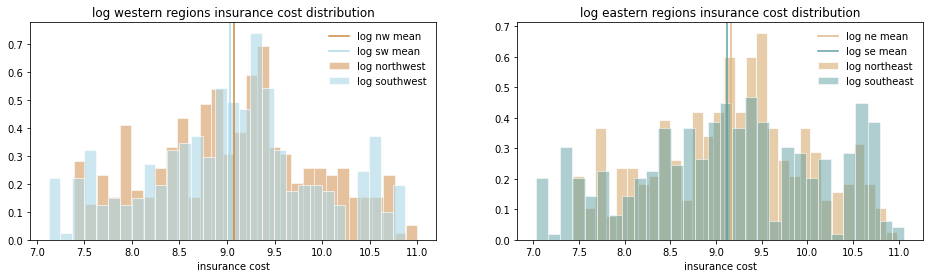

In [956]:
# log transformation
log_nw = np.log(nw)
log_sw = np.log(sw)
log_ne = np.log(ne)
log_se = np.log(se)

# re-plotting histograms
f, (ax1, ax2)= plt.subplots(1, 2, figsize=(16,4))

# logged western regions insurance cost distribution
ax1.hist(log_nw, alpha= 0.5, label= 'log northwest', bins= 30, density= True, color= 'peru', edgecolor= 'white')
ax1.hist(log_sw, alpha= 0.6, label= 'log southwest', bins= 30, density= True, color= 'lightblue', edgecolor= 'white')
ax1.set(title= 'log western regions insurance cost distribution', xlabel= 'insurance cost')
ax1.axvline(x= np.mean(log_nw), color= 'peru', label= 'log nw mean')
ax1.axvline(x= np.mean(log_sw), color= 'lightblue', label= 'log sw mean')
ax1.legend(frameon= False, loc= 'best')

# logged eastern regions insurance cost distribution
ax2.hist(log_ne, alpha= 0.7, label= 'log northeast', bins= 30, density= True, color= 'burlywood', edgecolor= 'white')
ax2.hist(log_se, alpha= 0.5, label= 'log southeast', bins= 30, density= True, color= 'cadetblue', edgecolor= 'white')
ax2.set(title= 'log eastern regions insurance cost distribution', xlabel= 'insurance cost')
ax2.axvline(x= np.mean(log_ne), color= 'burlywood', label= 'log ne mean')
ax2.axvline(x= np.mean(log_se), color= 'cadetblue', label= 'log se mean')
ax2.legend(frameon= False, loc= 'best')

plt.show()

In [957]:
# ANOVA
sig_threshold = 0.05
fstat, pval = stat.f_oneway(log_nw, log_sw, log_ne, log_se)

if pval < sig_threshold:
    print('p-value of ANOVA test:', round(pval, 2), '< significant threshold (0.05)\n')
    print('at least one pair of regions has significantly different insurance costs.')
else:
    print('p-value of ANOVA test:', round(pval, 2), '> significant threshold (0.05)\n')
    print('there is no significant different in insurance costs of between any pair of regions.')

p-value of ANOVA test: 0.24 > significant threshold (0.05)

there is no significant different in insurance costs of between any pair of regions.


p-value of ANOVA test is greater than significance threshold of 0.05. For this reason, null hypothesis is true and there is no significant difference in insurance cost of regions. We conclude that

> <span style= 'color:goldenrod'> **There is no association between region and insurance cost** </span>



#### Then why do southeasterns pay high insurance cost? 💡🧐

southeast has the highest inurance cost. To further understand why patients from southeast pay large amounts on insurance compared to the other three regions, we need to know how regions are related to other factors such age, BMI, smoking status and number of children.

### region and age
to calculate the average age of patients in a specific region prompotted by the user:

In [958]:
patients.region_avg_age('northwest')

The average age of patients in northwest is: 39.2 years old.


In [959]:
patients.region_avg_age('southwest')

The average age of patients in southwest is: 39.5 years old.


In [960]:
patients.region_avg_age('northeast')

The average age of patients in northeast is: 39.3 years old.


In [961]:
patients.region_avg_age('southeast')

The average age of patients in southeast is: 38.9 years old.


#### Is region and patient's age associated?

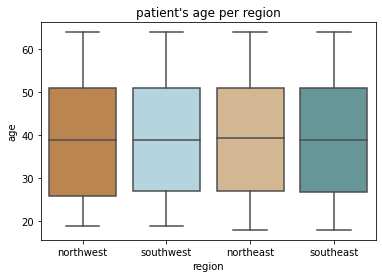

In [962]:
# plotting patients age for the four regions
sns.boxplot(data= insurance, x= 'region' , y= 'age', palette= ['peru', 'lightblue','burlywood','cadetblue'], order=['northwest','southwest', 'northeast', 'southeast'])
plt.title('patient\'s age per region')
plt.show()

There is nothing much to say here, the average age of patients in the four regions is around 39 years old. The middle 50% of ages in the four regions is very similar too with no outliers. It seems like there is no association between patient's age and region, let's statistically confirm this.

I will be running a **Chi-Square** test:

**H0:** There is *no* association between patient's age group and the region they are from.

**H1:** There *is* an association between patient's age group and the region they are from.

First, let's get contingency table of frequencies then plug it in Chi-Square function:

In [963]:
# contingency table of frequencies
Xtab= pd.crosstab(insurance['age group'], insurance['region'])
Xtab

region,northeast,northwest,southeast,southwest
age group,,,,
group1 (18-30),107,108,123,106
group2 (31-41),68,71,77,68
group3 (42-52),76,73,86,77
group4 (53-64),73,73,78,74


In [964]:
# chi-Square test
chi2, pval, dof, expected = stat.chi2_contingency(Xtab)
print('p-value of chi-square test: {:.2}'.format(pval))

p-value of chi-square test: 1.0


At a significance level of 0.05, chi-square p-value is insignificant, our null hypothesis is true we conclude that there is no association between patient's age group and the region they are from.

> <span style= 'color:skyblue'> **There is no association between patient's age and region** </span>

### region and BMI
to calculate the average BMI of patients in a specific region prompotted by the user:

In [965]:
patients.region_avg_bmi('northwest')

The average BMI of patients in northwest is: 29.2


In [966]:
patients.region_avg_bmi('southwest')

The average BMI of patients in southwest is: 30.6


In [967]:
patients.region_avg_bmi('northeast')

The average BMI of patients in northeast is: 29.17


In [968]:
patients.region_avg_bmi('southeast')

The average BMI of patients in southeast is: 33.36


southeast has the highest average BMI compared to other regions. The high BMI might contribute to the high insurance cost in southeast.

#### Is region and patient's BMI associated?

let's start by plotting BMI of the four regions, to better visualize what we are dealing with:

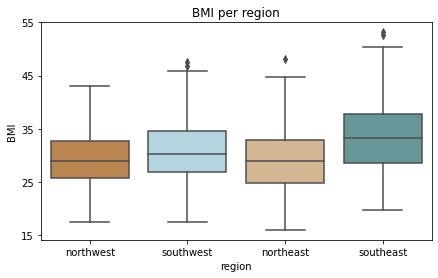

In [969]:
# plotting patients BMI in the four regions
f, ax= plt.subplots(1, 1, figsize=(7, 4))
sns.boxplot(data= insurance, x= 'region', y= 'bmi', palette= ['peru', 'lightblue','burlywood','cadetblue'], order=['northwest','southwest', 'northeast', 'southeast'])
ax.set(ylabel= 'BMI', title= 'BMI per region')
ax.set_yticks([x for x in range(15, 61, 10)])
ax.set_yticklabels([x for x in range(15, 61, 10)])
plt.show()

In general, there is some overlap between the boxes indicating that there is no large difference in patients BMI. Southeast has some outliers pointing to patients with high BMI. Also, southeast has a higher BMI median compared to the other regions. To confirm if there is any pairwise differences BMI and region, we will run **ANOVA** test with the following hypotheses:

**H0:** There is *no* difference in BMI of regions.

**H1:** There *is* a difference in BMI of at least one pair of regions.

Again, assuming that the data was randomly collected. We are going to check standard deviation ratio for patients' BMI of the four regions (aiming for a value close to 1) and plot their distribution:

In [970]:
# BMI of the four regions
nw_bmi = insurance.bmi[insurance.region == 'northwest']
sw_bmi = insurance.bmi[insurance.region == 'southwest']
ne_bmi = insurance.bmi[insurance.region == 'northeast']
se_bmi = insurance.bmi[insurance.region == 'southeast']

# standard deviation ratio
print('standard deviation ratios')
print('nw/ne BMI std ratio:',round(np.std(nw_bmi)/np.std(ne_bmi), 1))
print('nw/sw BMI std ratio:',round(np.std(nw_bmi)/np.std(sw_bmi), 1))
print('nw/se BMI std ratio:',round(np.std(nw_bmi)/np.std(se_bmi), 1))
print('sw/ne BMI std ratio:',round(np.std(sw_bmi)/np.std(ne_bmi), 1))
print('sw/se BMI std ratio:',round(np.std(sw_bmi)/np.std(se_bmi), 1))
print('ne/se BMI std ratio:',round(np.std(ne_bmi)/np.std(se_bmi), 1))

standard deviation ratios
nw/ne BMI std ratio: 0.9
nw/sw BMI std ratio: 0.9
nw/se BMI std ratio: 0.8
sw/ne BMI std ratio: 1.0
sw/se BMI std ratio: 0.9
ne/se BMI std ratio: 0.9


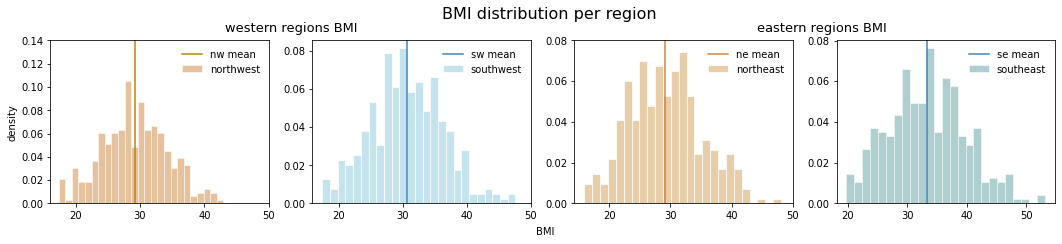

In [971]:
# plotting BMI distribution in every region
f, (ax1, ax2, ax3, ax4)= plt.subplots(1, 4, figsize=(18,3))
f.text(0.51 , 1, 'BMI distribution per region', fontsize= 16, ha='center', va='center')
f.text(0.5, -0.02, 'BMI')
f.text(0.26, 0.92, 'western regions BMI', fontsize= 13)
f.text(0.67, 0.92, 'eastern regions BMI', fontsize= 13)

# western regions BMI distribution
ax1.hist(nw_bmi,alpha= 0.5, label= 'northwest', bins= 25, density= True, color= 'peru', edgecolor= 'white')
ax2.hist(sw_bmi, alpha= 0.7, label= 'southwest', bins= 25, density= True, color= 'lightblue', edgecolor= 'white')
ax1.axvline(x= np.mean(nw_bmi), color= 'darkgoldenrod', label= 'nw mean')
ax2.axvline(x= np.mean(sw_bmi), color= 'steelblue', label= 'sw mean')
ax1.set_yticks([x for x in np.arange(0.00, 0.15, 0.02)])
ax1.set_xticks([x*10 for x in range(2, 6)])
ax2.set_xticks([x*10 for x in range(2, 6)])
ax1.set(ylabel = 'density')
ax1.legend(frameon= False, loc= 'best')
ax2.legend(frameon= False, loc= 'best')

# eastern regions BMI distribution
ax3.hist(ne_bmi, alpha= 0.7, label= 'northeast', bins= 25, density= True, color= 'burlywood', edgecolor= 'white')
ax4.hist(se_bmi, alpha= 0.5, label= 'southeast', bins= 25, density= True, color= 'cadetblue', edgecolor= 'white')
ax3.axvline(x= np.mean(ne_bmi), color= 'peru', label= 'ne mean')
ax4.axvline(x= np.mean(se_bmi), color= 'steelblue', label= 'se mean')
ax3.set_yticks([x for x in np.arange(0.00, 0.09, 0.02)])
ax3.set_xticks([x*10 for x in range(2, 6)])
ax3.legend(frameon= False, loc= 'best')
ax4.legend(frameon= False, loc= 'best')

plt.show()

standard deviation ratio: close to 1.

distribution: from the four histograms above, BMI of regions is normally distributed.

we can proceed with ANOVA test.

In [972]:
# ANOVA
sig_threshold = 0.05
fstat, pval = stat.f_oneway(nw_bmi, sw_bmi, ne_bmi, se_bmi)

if pval < sig_threshold:
    print('p-value of ANOVA test:', '{:.24f}'.format(pval), '< significant threshold (0.05)\n')
    print('at least one pair of regions has significantly different BMI.')
else:
    print('p-value of ANOVA test:', '{:.25f}'.format(pval), '> significant threshold (0.05)\n')
    print('there is no significant different in BMI of between any pair of regions.')

p-value of ANOVA test: 0.000000000000000000000002 < significant threshold (0.05)

at least one pair of regions has significantly different BMI.


given the ANOVA p-value, we reject the null hypothesis in favour of the alternative hypothesis.

to point out which pair(s) of regions has a significant difference in their patients' BMI. We will use **Tukey's range** test:

In [973]:
# Tukey's range test
print(pairwise_tukeyhsd(insurance.bmi, insurance.region, 0.05))

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
northeast northwest   0.0263    0.9 -1.1552  1.2078  False
northeast southeast   4.1825  0.001   3.033   5.332   True
northeast southwest   1.4231 0.0107  0.2416  2.6046   True
northwest southeast   4.1562  0.001  3.0077  5.3047   True
northwest southwest   1.3968 0.0127  0.2162  2.5774   True
southeast southwest  -2.7594  0.001 -3.9079 -1.6108   True
----------------------------------------------------------


with significance level of 0.05, there is significant difference in BMI between: northeast/southeast, northeast/southwest, northwest/southeast, northwest/southwest and southeast/southwest region pairs (That's five out of six region pairs!).

The largest BMI difference recoreded is between: northeast/southeast, northwest/southeast and southeast/southwest region pairs (p-value = 0.001 < 0.05). All of these pairs has southeast is them.

We can also use **Chi-Square** test to double confirm the association:

**H0:** There is *no* association between patient's BMI group and the region they are from.

**H1:** There *is* an association between patient's BMI group and the region they are from.

In [974]:
# contingency table of frequencies
Ytab = pd.crosstab(insurance['bmi group'], insurance['region'])
Ytab

region,northeast,northwest,southeast,southwest
bmi group,,,,
normal weight,73,63,41,48
obese,143,148,243,173
overweight,98,107,80,101
underweight,10,7,0,3


In [975]:
# chi-square test
chi2, pval, dof, expected = stat.chi2_contingency(Ytab)
print('p-value of chi-square test:', pval)
print('chi-square statistic:', round(chi2, 2))
print('contingency table size', Ytab.size)

p-value of chi-square test: 4.015170331756739e-09
chi-square statistic: 57.52
contingency table size 16


At a significance level of 0.05, chi-square p-value is significant and chi-square statistic is larger than contingency table size, meaning that there is an association between patient's BMI group and the region they are from.

> <span style= 'color:skyblue'> **There is an association between patient's BMI and region** </span>

### region and smoking status
to count the number of smokers and non-smokers and their proportion in a specific region prompotted by the user:

In [976]:
patients.region_smoking('northwest')

In northwest: 
 number of smokers: 58 		 17.85% 
 number of non-smokers: 267 	 82.15%


In [977]:
patients.region_smoking('southwest')

In southwest: 
 number of smokers: 58 		 17.85% 
 number of non-smokers: 267 	 82.15%


In [978]:
patients.region_smoking('northeast')

In northeast: 
 number of smokers: 67 		 20.68% 
 number of non-smokers: 257 	 79.32%


In [979]:
patients.region_smoking('southeast')

In southeast: 
 number of smokers: 91 		 25.00% 
 number of non-smokers: 273 	 75.00%


southeast has highest number/proprtion of smokers compared to other regions. The high number/proportion of smokers might contribute to the high insurance cost in southeast.

#### Is region and patient's smoking status associated?

Let's begin by visualizing the number of smokers and non-smokers in every region:

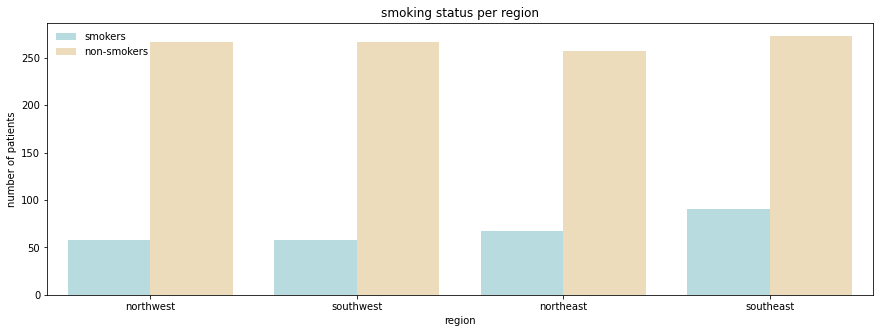

In [980]:
# plotting smoking-status per region
plt.figure(figsize=(14.8,5))
sns.countplot(data = insurance, x= 'region', hue= 'smoker', palette= ['powderblue', 'wheat'], order= ['northwest','southwest', 'northeast', 'southeast'])
plt.title('smoking status per region')
plt.ylabel('number of patients')
plt.legend(loc= 'upper left', frameon= False, labels= ['smokers', 'non-smokers'])
plt.show()

The majority of patients in all the four regions are non-smokers. The four regions have approximately a smiliar number of non-smokers. For smokers, the four regions have slightly varied numbers, with the highest number of smokers in southeast.

to check if there is an association between smoking status and region, we will run **Chi-Square** test with the following hypotheses:

**H0:** there is *no* association between region and patient's smoking status

**H1:** there *is* an association between region and patient's smoking status

to run the test, we are assuming that the data is randomly collected and we already know that smoking stauses are mutually exclusive.

Let's calculate contingency table of frequencies and compare it to expected values if there is *no* association between region and patient's smoking status:

In [981]:
# contingency table of frequencies "observed"
Ztab = pd.crosstab(insurance.region, insurance.smoker)
Ztab

smoker,no,yes
region,,
northeast,257,67
northwest,267,58
southeast,273,91
southwest,267,58


In [982]:
# chi2-square test
chi2, pval, dof, expected = stat.chi2_contingency(Ztab)

# expected contingency table "expected"
print(np.round(expected))

[[258.  66.]
 [258.  67.]
 [289.  75.]
 [258.  67.]]


just by looking, the numbers in contingency table of frequencies and expected are very close to each other. To rephrase it, the expected values when there is *no* association between patient's smoking status and region are smiliar to what we observed from the data, pointing that there is no association between smoking status and region.

Yet, we will continue with our test to have a solid conclusion.

now, let's see *how* different are obsereved and expected values with numerical value:

In [983]:
# chi2
print('chi-square statistic:', round(chi2, 2))
print('contingency table size:', Ztab.size)

chi-square statistic: 7.34
contingency table size: 8


the two values are not far from each other, which adds to our evidence that patient's smoking status and region are not associated. 

lastly, let's print out our chi-square p-value:

In [984]:
# chi square p-value
print('p-value of chi-square test:', round(pval, 2))

p-value of chi-square test: 0.06


at a significance level of 0.05, p-value of chi-square test is slightly larger. We don't reject the null hypothesis and we conclude that whether a patient is a smoker or not isn't associated with the region they are from.
> <span style= 'color:skyblue'> **There is no association between patient's smoking status and region** </span>

### region and children number

we don't have a method in our class to sort patients in a specific region by their number of children.

#### Is there an association between the number of children a patient has and the region they are from?

I will run a **Chi-square** test with the following hypotheses:

**H0:** There is *no* association between patient's children number and the region they are from.

**H1:** There *is* an association between patient's children number and the region they are from.

In [985]:
# contingency table of frequencies
Wtab= pd.crosstab(insurance['offspring group'], insurance['region'])
Wtab

region,northeast,northwest,southeast,southwest
offspring group,,,,
1-3 children,167,186,196,172
>3 children,10,7,11,15
no children,147,132,157,138


In [986]:
# chi-square test
chi2, pval, dof, expected = stat.chi2_contingency(Wtab)
print('p-value of chi-square test:', round(pval,2))

p-value of chi-square test: 0.53


At a significance level of 0.05, chi-square p-value is insignificant meaning that there isn't a significant difference between patient children number of different regions. Therefore, we don't reject the null hypothesis and we conclude that there is no association between the number of children a patient has and the region they are from.
> <span style= 'color:skyblue'> **There is no association between patient's children number and region** </span>

### region and gender
we don't have a method to classify patients in the four regions based on thier gender. Let's visualize the count of females and males in the four regions:

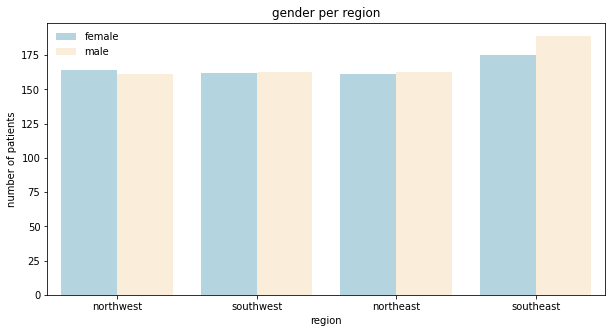

In [987]:
# plotting females vs. males per region
plt.figure(figsize=(10,5))
sns.countplot(data = insurance, x= 'region', hue= 'sex', palette= ['lightblue', 'papayawhip'], order= ['northwest','southwest', 'northeast', 'southeast'])
plt.title('gender per region')
plt.ylabel('number of patients')
plt.legend(loc= 'best', frameon= False, labels= ['female', 'male'])
plt.show()

The first four regions have approximately a close number of female and male patients. Southeast has more male patients than females.

#### Is there an association between patient's gender has and the region they are from?

I will run a **Chi-square** test with the following hypotheses:

**H0:** There is *no* association between patient's gender and the region they are from.

**H1:** There *is* an association between patient's gender and the region they are from.

First, I will get the contingency table of frequencies then plug it in Chi-Square function:

In [988]:
# contingency table of frequencies
Gtab = pd.crosstab(insurance.sex, insurance.region)
Gtab

region,northeast,northwest,southeast,southwest
sex,,,,
female,161,164,175,162
male,163,161,189,163


In [989]:
# chi-square test
chi2, pval, dof, expected = stat.chi2_contingency(Gtab)
print('p-value of chi-square test:', round(pval,2))

p-value of chi-square test: 0.93


At a significance level of 0.05, chi-square p-value is insignificant meaning that there isn't a significant difference between patient gender in different regions. Therefore, we don't reject the null hypothesis and we conclude that there is no association between patient's gender and the region they are from.
> <span style= 'color:skyblue'> **There is no association between patient's gender and region** </span>

## Conclusions

* Insurance cost is affected by patinet's age, BMI, children number and smoking status.
* Patient's gender and the region they are from did not significantly effect insurance cost.
* Southeastern patients paid the highest insurance cost compared to other regions. Upon further investigation, we concluded that there is an association between the region the patient is from and their BMI, but not their gender, age, smoking status or children number. It's worth nothing that southeastern patients reported the highest BMI.